# Airline Line Ticket Price Prediction Model Using Kaggle Dataset





Importing necessary library and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Importing the required dataset

The dataset that we are working on is a static dataset of airline companies

In [2]:
data_train=pd.read_excel('/content/Data_Train.xlsx')

In [3]:
#pip install -U dataprep

In [4]:
#from dataprep.eda import create_report
#import pandas as pd
#dataframe = pd.read_excel('/content/Data_Train.xlsx')
#create_report(dataframe)

In [5]:
data_train.shape

(10683, 11)

In [6]:
data_train.loc[100]

Airline                Jet Airways
Date_of_Journey         15/05/2019
Source                     Kolkata
Destination               Banglore
Route              CCU → BOM → BLR
Dep_Time                     08:25
Arrival_Time                 20:45
Duration                   12h 20m
Total_Stops                 1 stop
Additional_Info            No info
Price                        14781
Name: 100, dtype: object

In [7]:
#from dataprep.eda import create_report
#import pandas as pd
#dataframe = pd.read_excel("/content/Data_Train.xlsx")
#create_report(dataframe)

#Data preparation and exploration,

Clean, Prepare & Manipulate Data

Real-world data often has unorganized, missing, or noisy elements. Therefore, for Machine Learning success, after we chose our data, we need to clean, prepare, and manipulate the data.

This process is a critical step, and people typically spend up to 80% of their time in this stage. Having a clean data set helps with your model’s accuracy down the road.

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


As we can see the dataset has different data type

In [9]:
data_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

As less missing values,I can directly drop these table 

In [11]:
data_train.dropna(inplace=True)

In [12]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

We can see from the dataframe that the date_of_journey feature is object data type.We need to convert into time-stamp format because we need to  use this column properly for prediction,and also our machine learning 
 model will not be able to understand these string values,it can only understand Time-stamp.

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [13]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x

In [14]:
data_train['Dep_']=data_train['Dep_Time'].apply(deparrtime)
data_train['Arrival_']=data_train['Arrival_Time'].apply(deparrtime)

In [15]:
def to_datetime_type(col):
  data_train[col]=pd.to_datetime(data_train[col])

In [16]:
data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Dep_', 'Arrival_'],
      dtype='object')

In [17]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
   to_datetime_type(i)

In [18]:
data_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Dep_                       object
Arrival_                   object
dtype: object

In [19]:
data_train['day']=data_train['Date_of_Journey'].dt.day

In [20]:
data_train['month']=data_train['Date_of_Journey'].dt.month

In [21]:
data_train['weekday']= pd.to_datetime(data_train.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [22]:
data_train['year']=data_train['Date_of_Journey'].dt.year

In [23]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_,Arrival_,day,month,weekday,year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,Night,Night,24,3,6,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-19 05:50:00,2021-08-19 13:15:00,7h 25m,2 stops,No info,7662,Morning,Afternoon,5,1,5,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,Morning,Night,6,9,4,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-08-19 18:05:00,2021-08-19 23:30:00,5h 25m,1 stop,No info,6218,Evening,Night,5,12,3,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-08-19 16:50:00,2021-08-19 21:35:00,4h 45m,1 stop,No info,13302,Evening,Night,3,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-08-19 19:55:00,2021-08-19 22:25:00,2h 30m,non-stop,No info,4107,Evening,Night,4,9,2,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-08-19 20:45:00,2021-08-19 23:20:00,2h 35m,non-stop,No info,4145,Evening,Night,27,4,5,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-08-19 08:20:00,2021-08-19 11:20:00,3h,non-stop,No info,7229,Morning,Afternoon,27,4,5,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-08-19 11:30:00,2021-08-19 14:10:00,2h 40m,non-stop,No info,12648,Afternoon,Afternoon,3,1,3,2019


In [24]:
data_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Dep_                       object
Arrival_                   object
day                         int64
month                       int64
weekday                     int64
year                        int64
dtype: object

In [25]:
data_train['year'].unique()

array([2019])

In [26]:
data_train['month'].unique()

array([ 3,  1,  9, 12,  6,  5,  4])

In [27]:
data_train['Destination'].replace('Delhi','New Delhi',inplace=True)

In [28]:
data_train['Source'].replace('Delhi','New Delhi',inplace=True)

In [29]:
data_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [30]:
data_train['Additional_Info'].replace({"No info":'No Info'}, inplace = True)

In [31]:
data_train['month'].value_counts()

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64

Since we have converted Date_of_Journey column into integers, we can drop the column as it is of no use.

In [32]:
data_train.drop('Date_of_Journey',axis=1, inplace=True)

Droping the year column as it is same all over the data.

In [33]:
data_train.drop('year',axis=1, inplace=True)

In [34]:
data_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_,Arrival_,day,month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No Info,3897,Night,Night,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-19 05:50:00,2021-08-19 13:15:00,7h 25m,2 stops,No Info,7662,Morning,Afternoon,5,1,5
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No Info,13882,Morning,Night,6,9,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-19 18:05:00,2021-08-19 23:30:00,5h 25m,1 stop,No Info,6218,Evening,Night,5,12,3
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-19 16:50:00,2021-08-19 21:35:00,4h 45m,1 stop,No Info,13302,Evening,Night,3,1,3


Extracting values from Dep_Time and Arrival_Time as it is also similar to date of journey

We will create a function to seperate the features from the date fields.

In [35]:
def hours_extract(df,column):
  df[column+"_hour"]=df[column].dt.hour

In [36]:
def minutes_extract(df,column):
  df[column+"_minute"]=df[column].dt.minute

In [37]:
hours_extract(data_train,'Dep_Time')
hours_extract(data_train,'Arrival_Time')

In [38]:
minutes_extract(data_train,'Dep_Time')
minutes_extract(data_train,'Arrival_Time')

In [39]:
data_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_,Arrival_,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No Info,3897,Night,Night,24,3,6,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-19 05:50:00,2021-08-19 13:15:00,7h 25m,2 stops,No Info,7662,Morning,Afternoon,5,1,5,5,13,50,15
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No Info,13882,Morning,Night,6,9,4,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-19 18:05:00,2021-08-19 23:30:00,5h 25m,1 stop,No Info,6218,Evening,Night,5,12,3,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-19 16:50:00,2021-08-19 21:35:00,4h 45m,1 stop,No Info,13302,Evening,Night,3,1,3,16,21,50,35


In [40]:
#data_train.iloc[2029]

In [41]:
data_train.describe()

,Price,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,2.892436,12.491013,13.349186,24.409287,24.690601
std,4611.548810,8.803800,2.987626,1.836124,5.748820,6.859317,18.767801,16.506808
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,1.000000,8.000000,8.000000,5.000000,10.000000
50%,8372.000000,6.000000,5.000000,3.000000,11.000000,14.000000,25.000000,25.000000
75%,12373.000000,21.000000,6.000000,4.000000,18.000000,19.000000,40.000000,35.000000
max,79512.000000,27.000000,12.000000,6.000000,23.000000,23.000000,55.000000,55.000000


Now that we have filtered the necessary components of the label we can now drop the unnessary labels

In [42]:
data_train.drop('Dep_Time',axis=1,inplace=True)
data_train.drop('Arrival_Time',axis=1,inplace=True)

In [43]:
data_train.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_,Arrival_,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,3897,Night,Night,24,3,6,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,7662,Morning,Afternoon,5,1,5,5,13,50,15
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No Info,13882,Morning,Night,6,9,4,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,6218,Evening,Night,5,12,3,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,13302,Evening,Night,3,1,3,16,21,50,35


We again need to apply pre-processing in the duration column to seperate the duration hours and minutes

In [44]:
duration=list(data_train['Duration'])

for i in range(len(duration)):
  if len((duration[i]).split(' '))==2:
    pass
  else:
    if 'h' or 'H' in duration[i]:
      duration[i]=duration[i] + ' 0m'
    else:
      duration[i]='0h ' + duration[i]


In [45]:
data_train['Duration']=duration

In [46]:
data_train['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [47]:
def hour(x):
    return x.split(' ')[0][0:-1]


In [48]:
def minute(y):
    return y.split(' ')[1][0:-1]

In [49]:
data_train['travel_hours']=data_train['Duration'].apply(hour)

In [50]:
data_train['travel_minutes']=data_train['Duration'].apply(minute)

In [51]:
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_,Arrival_,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,3897,Night,Night,24,3,6,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,7662,Morning,Afternoon,5,1,5,5,13,50,15,7,25
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info,13882,Morning,Night,6,9,4,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,6218,Evening,Night,5,12,3,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,13302,Evening,Night,3,1,3,16,21,50,35,4,45


In [52]:
data_train.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
Dep_                   object
Arrival_               object
day                     int64
month                   int64
weekday                 int64
Dep_Time_hour           int64
Arrival_Time_hour       int64
Dep_Time_minute         int64
Arrival_Time_minute     int64
travel_hours           object
travel_minutes         object
dtype: object

In [53]:
data_train['Source'].unique()


array(['Banglore', 'Kolkata', 'New Delhi', 'Chennai', 'Mumbai'],
      dtype=object)

In [54]:
data_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

Need to convert the travel hours and minutes column to integer data type

In [55]:
data_train['travel_hours']=data_train['travel_hours'].astype(int)
data_train['travel_minutes']=data_train['travel_minutes'].astype(int)

In [56]:
data_train.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
Dep_                   object
Arrival_               object
day                     int64
month                   int64
weekday                 int64
Dep_Time_hour           int64
Arrival_Time_hour       int64
Dep_Time_minute         int64
Arrival_Time_minute     int64
travel_hours            int64
travel_minutes          int64
dtype: object

Handling categorical data

We are using 2 main Encoding Techniques to convert Categorical data into some numerical format.

1.   Label Encoding for Ordinal Data
2.   OneHotEncoding for Nominal Data



In [57]:
categorical_columns=[Columns for Columns in data_train.columns if data_train[Columns].dtype=='O']

In [58]:
categorical_columns

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Dep_',
 'Arrival_']

In [59]:
categorical_data=data_train[categorical_columns]

In [60]:
categorical_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_,Arrival_
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,Night,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,Morning,Afternoon
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info,Morning,Night
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,Evening,Night
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,Evening,Night


In [61]:
categorical_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

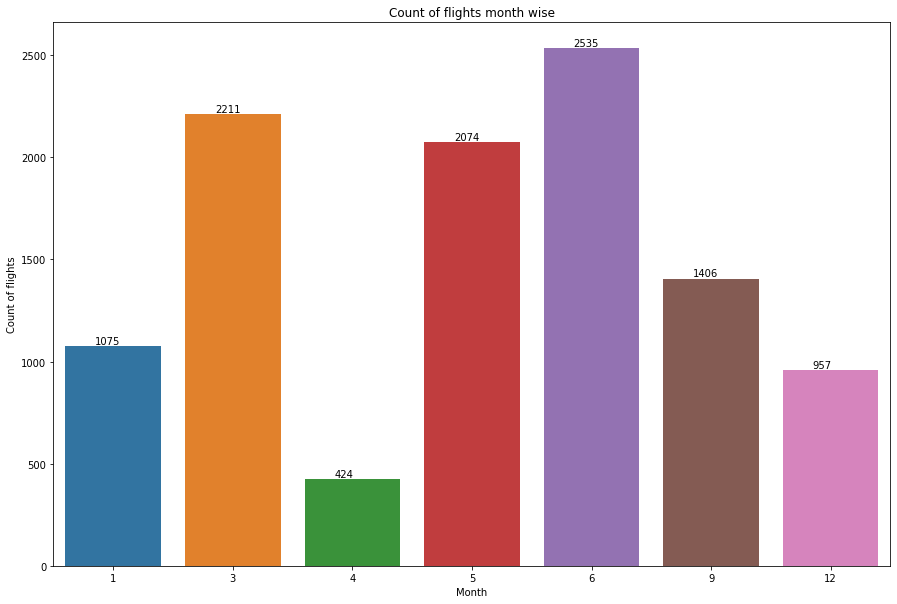

In [62]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'month', data = data_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [63]:
monthly_avg=data_train.groupby(['month']).agg({'Price':np.mean}).reset_index()

Analysis :
We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May.
This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time.
The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1.

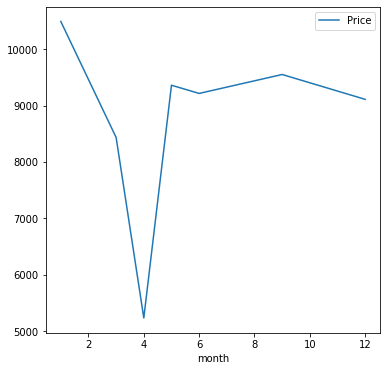

In [64]:
monthly_avg.plot(x='month',y='Price',figsize=(6,6))

We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.(since the count of tickets booked for travelling in May is the most, prior bookings are done in March)

#Destination vs Price

<function matplotlib.pyplot.show>

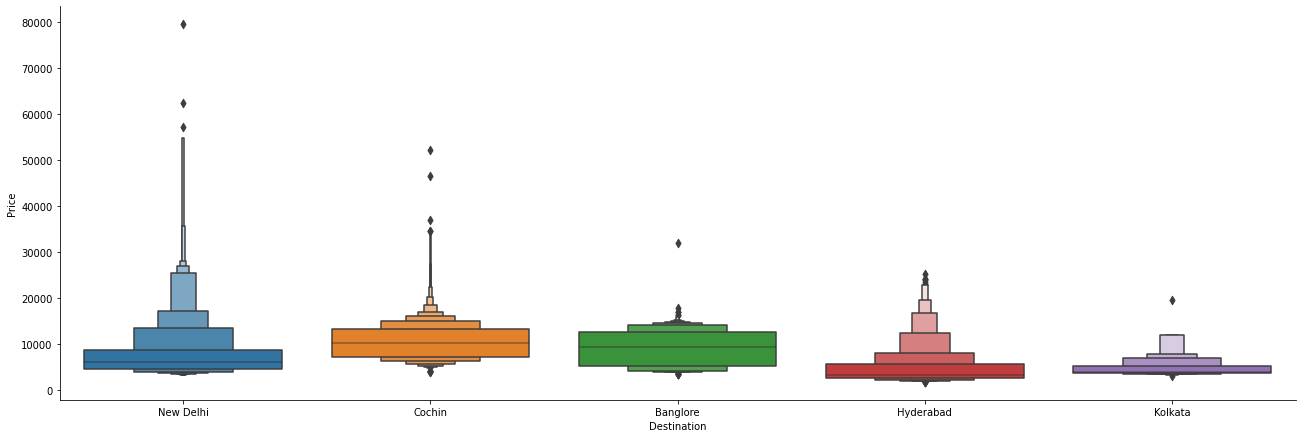

In [65]:
sns.catplot(y='Price',x='Destination',data= data_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

The airfare price range in Delhi & New Delhi is the maximum

#Source vs Price

<function matplotlib.pyplot.show>

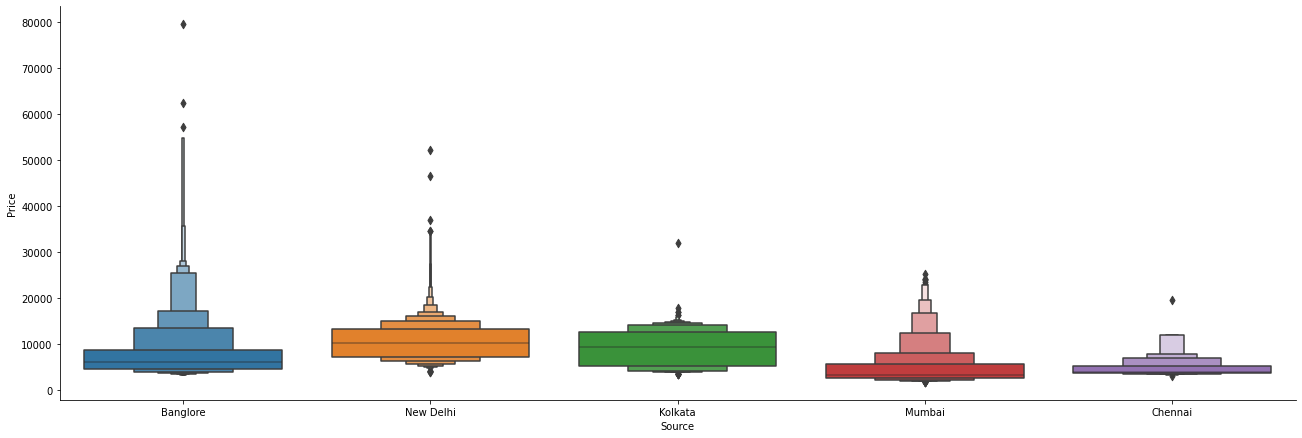

In [66]:
sns.catplot(y='Price',x='Source',data= data_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#Airline vs Price Analysis


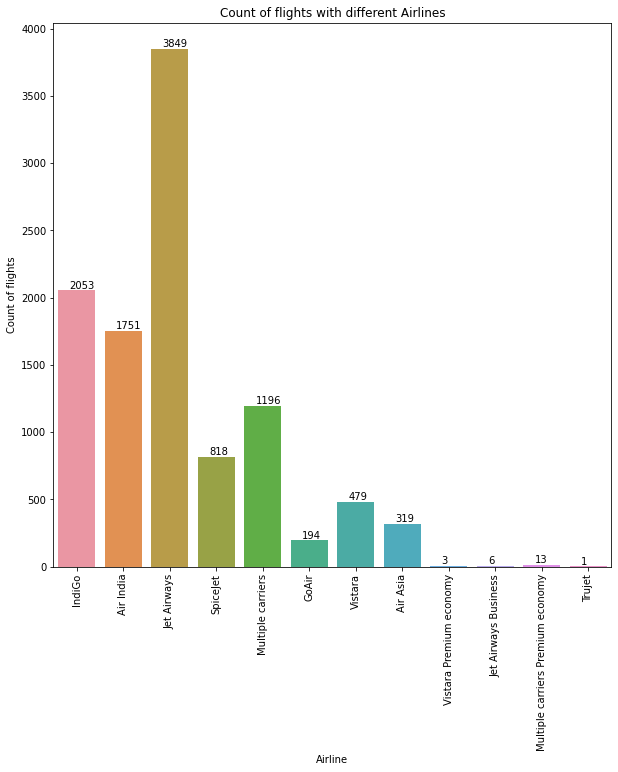

In [67]:
#Count of flights v/s Airline
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Jet Airways have the highest no. of flights followed by Indigo and Air India

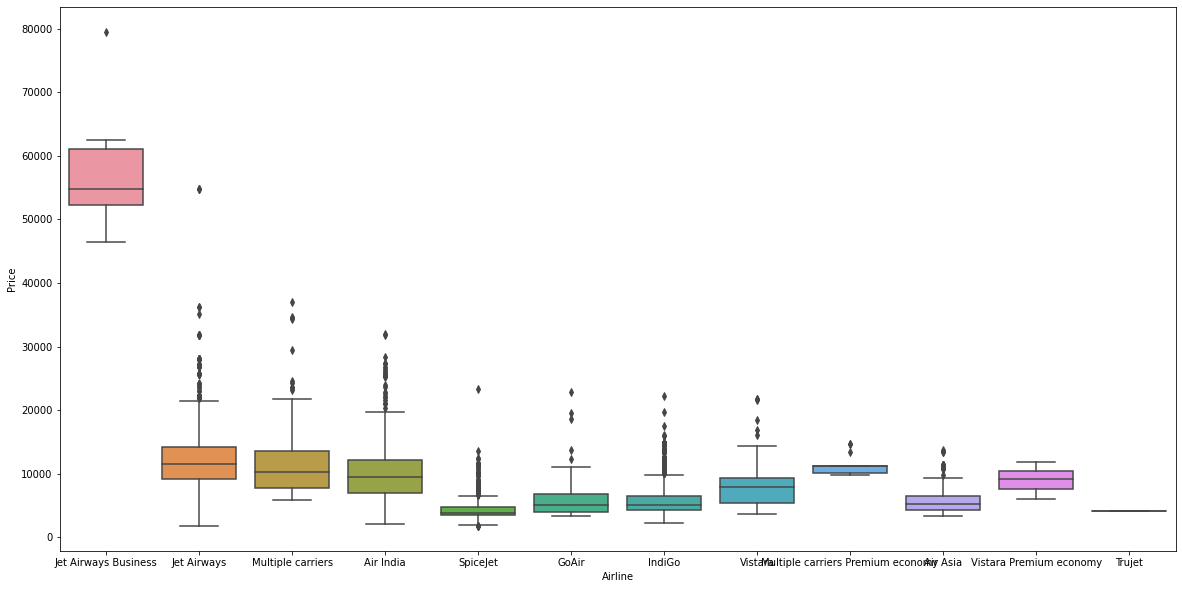

In [68]:
#Airline vs Price
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data=data_train.sort_values('Price',ascending=False))

Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range 

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

In [69]:
pip install chart-studio

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [70]:
from chart_studio.plotly import iplot

In [71]:
import plotly.express as px

Perform Total_Stops vs Price Analysis

[Text(0, 0, 'Night'),
 Text(0, 0, 'Morning'),
 Text(0, 0, 'Evening'),
 Text(0, 0, 'Afternoon')]

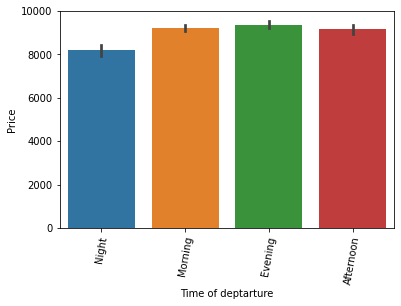

In [72]:
dep=sns.barplot(x='Dep_', y='Price', data=data_train)
dep.set_ylabel('Price')
dep.set_xlabel('Time of deptarture')
dep.set_xticklabels(dep.get_xticklabels(), rotation=80)

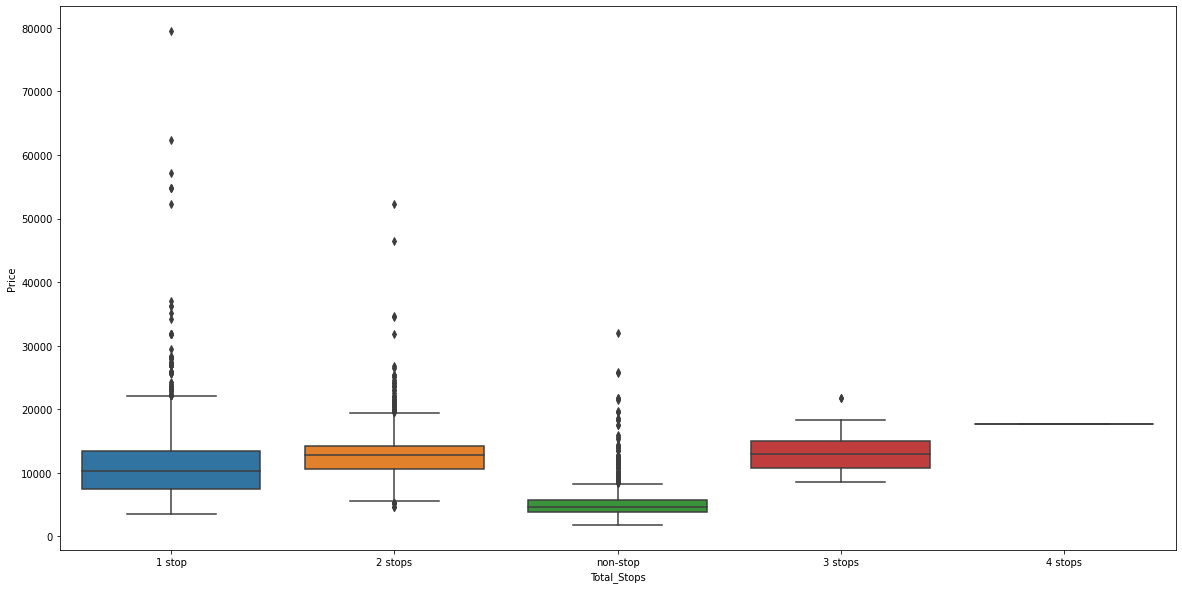

In [73]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Total_Stops',data=data_train.sort_values('Price',ascending=False))

In [74]:
categorical_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

get_dummies

In [75]:
airline=pd.get_dummies(categorical_data['Airline'],drop_first=True)
airline.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [76]:
# time of departure v/s count of flights
top_time=data_train.Dep_.value_counts().head(10)
top_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_, dtype: int64

[Text(0, 0, 'Night'),
 Text(0, 0, 'Afternoon'),
 Text(0, 0, 'Morning'),
 Text(0, 0, 'Evening')]

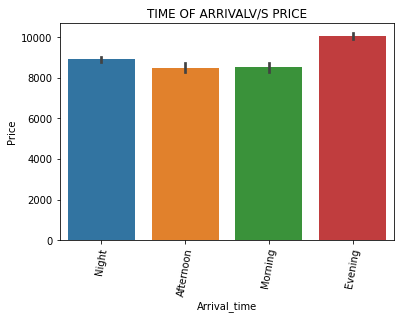

In [77]:
#TIME OF ARRIVAL V/S average price
Ta=sns.barplot(x='Arrival_', y='Price', data=data_train)
Ta.set_title('TIME OF ARRIVALV/S PRICE')
Ta.set_ylabel('Price')
Ta.set_xlabel('Arrival_time')
Ta.set_xticklabels(Ta.get_xticklabels(), rotation=80)

Early Morning flights are always cheaper and so are midnight flight prices.¶
Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.

In [78]:
categorical_data['Source'].value_counts()

New Delhi    4536
Kolkata      2871
Banglore     2197
Mumbai        697
Chennai       381
Name: Source, dtype: int64

#Source vs Price

New Delhi    4536
Kolkata      2871
Banglore     2197
Mumbai        697
Chennai       381
Name: Source, dtype: int64

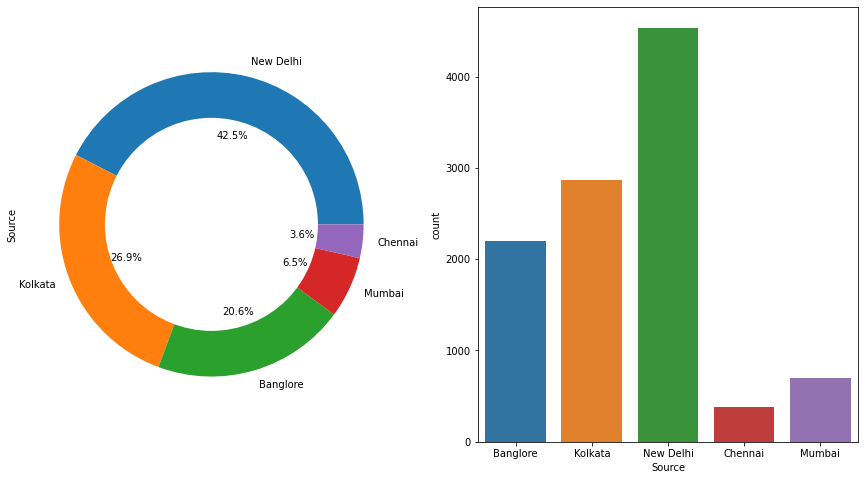

In [79]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
data_train['Source'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Source',data=data_train)
data_train['Source'].value_counts()

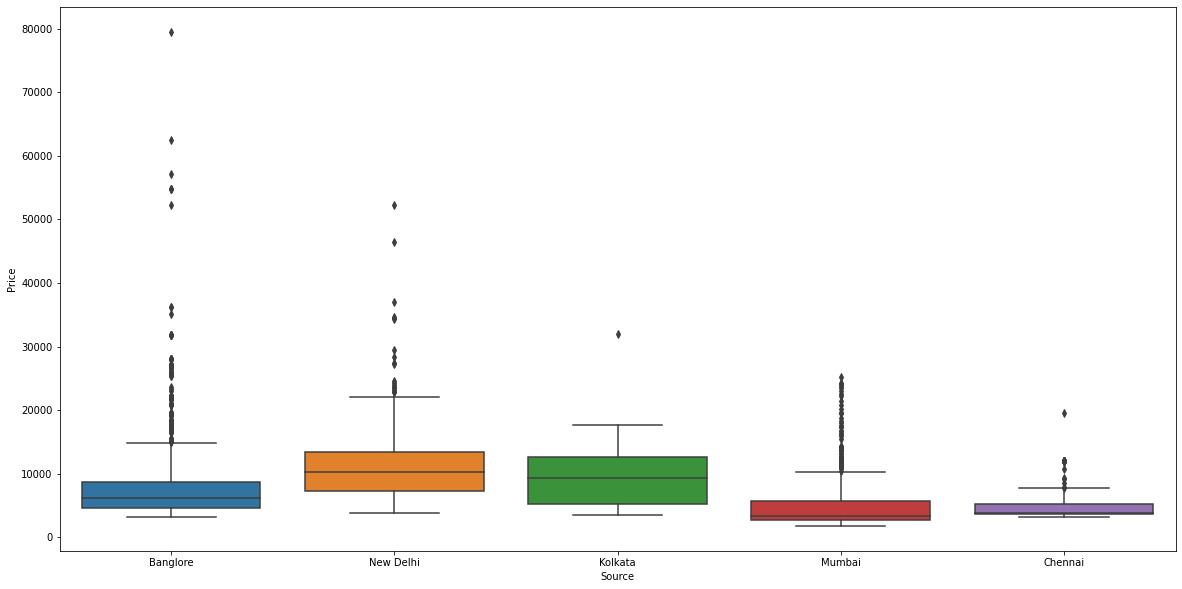

In [80]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Source',y='Price',data=data_train.sort_values('Price',ascending=False))

[Text(0, 0, 'non-stop'),
 Text(0, 0, '2 stops'),
 Text(0, 0, '1 stop'),
 Text(0, 0, '3 stops'),
 Text(0, 0, '4 stops')]

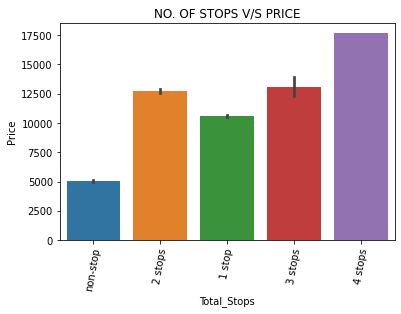

In [81]:
TS=sns.barplot(x='Total_Stops', y='Price', data=data_train)
TS.set_title('NO. OF STOPS V/S PRICE')
TS.set_ylabel('Price')
TS.set_xlabel('Total_Stops')
TS.set_xticklabels(TS.get_xticklabels(), rotation=80)

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

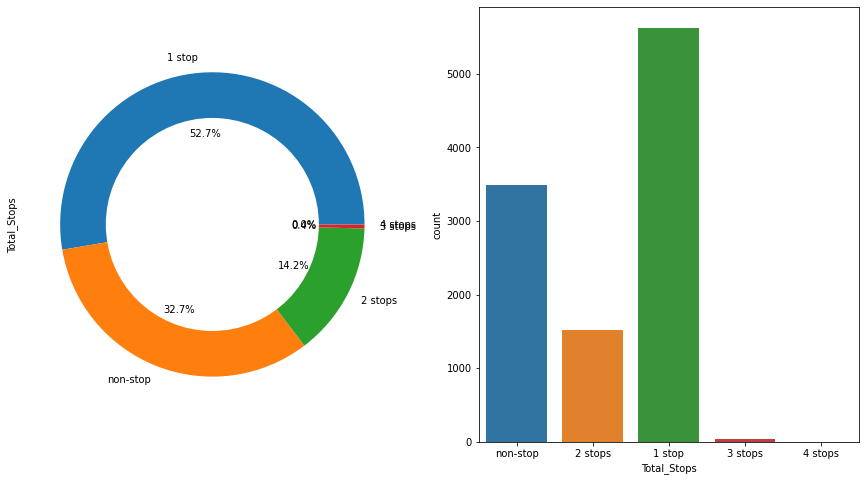

In [82]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
data_train['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Total_Stops',data=data_train)
data_train['Total_Stops'].value_counts()

As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.

In [83]:
data_train["day"].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4])

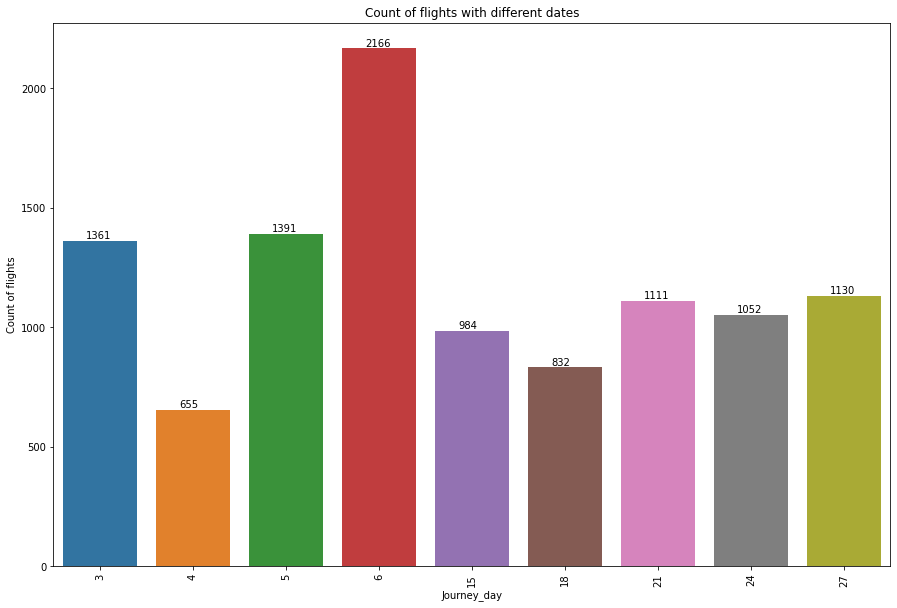

In [84]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'day', data =data_train)
plt.xlabel('Journey_day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '24'),
 Text(0, 0, '27')]

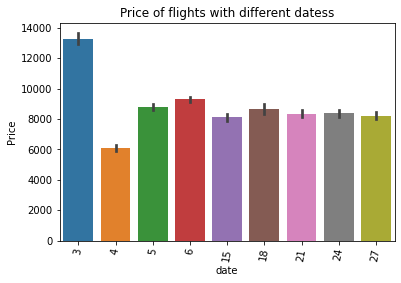

In [85]:
#Journey_Day v/s Average price
Ja=sns.barplot(x='day', y='Price', data=data_train)
Ja.set_title('Price of flights with different datess')
Ja.set_ylabel('Price')
Ja.set_xlabel('date')
Ja.set_xticklabels(Ja.get_xticklabels(), rotation=80)

It looks like that there's a trend in the air fare when compared to the day of respective months, prices are higher in the start of month but this is not a trend if you see from the broader perspective as this might be due to various reasons. For eg. the date of Journey is 10th March and people are booking towards 5th March or so, this will lead to higher flight prices.(Prices increase as near you date of booking is to the date of journey). So flight prices don't follow any particular pattern towards any time of the month.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

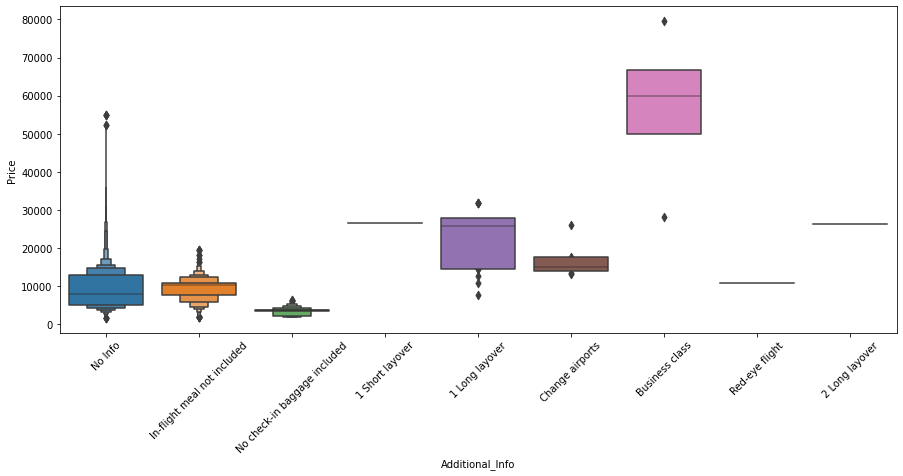

In [86]:
#price vs additional info
plt.figure(figsize=(15,6))
sns.boxenplot(x='Additional_Info',y='Price',data=data_train)
plt.xticks(rotation=45)

Flight price is higheer where the additional info contains Bussiness class followed by 1 long layover or 1 short/long layover.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



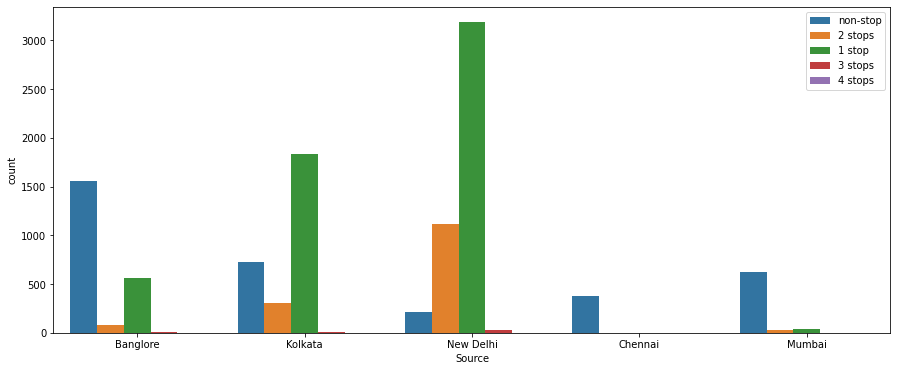

In [87]:
plt.figure(figsize=(15,6))
sns.countplot(data_train['Source'],hue='Total_Stops',data=data_train)
plt.legend(loc='upper right')

Banglore is the only source of flights where the most of the flights have no stops. Almost all the flights from chennai have no stops.

In [88]:
categorical_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_,Arrival_
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,Night,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,Morning,Afternoon
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info,Morning,Night
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,Evening,Night
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,Evening,Night


In [89]:
source=pd.get_dummies(categorical_data['Source'],drop_first=True)
source=source.rename(columns={"Kolkata": "Kolkata_s","New Delhi":"New Delhi_s"})
source.head()

,Chennai,Kolkata_s,Mumbai,New Delhi_s
0,0,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,0


Cochin       4536
Banglore     2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

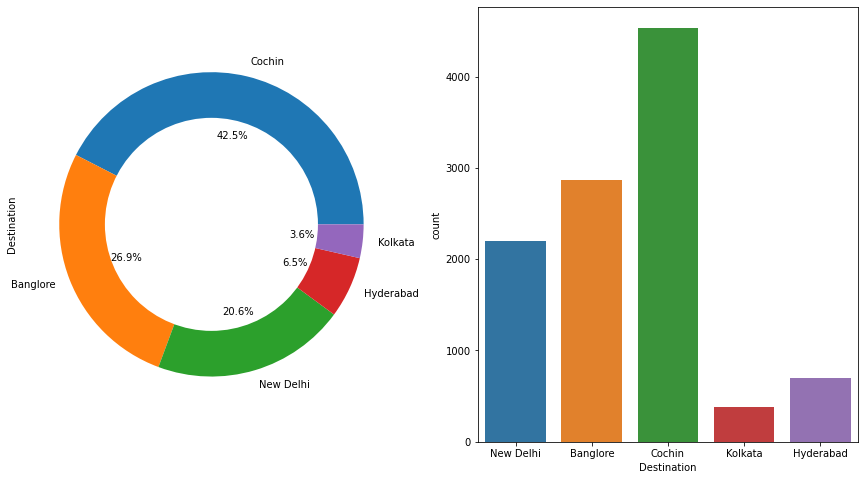

In [90]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
data_train['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Destination',data=data_train)
data_train['Destination'].value_counts()

Minimum 1759
Maximum 79512


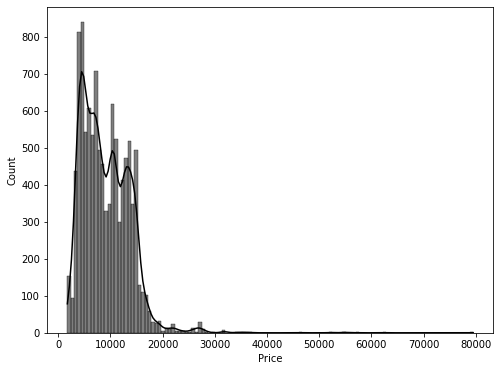

In [91]:
plt.figure(figsize=(8,6))
sns.histplot(data_train['Price'],kde=True,color='k')
print('Minimum',data_train['Price'].min())
print('Maximum',data_train['Price'].max())

In [92]:
#plt.figure(figsize=(8,6))
#sns.histplot(['Duration_mins'],kde=True,color='k')
#print('Minimum',df['Duration_mins'].min())
#print('Maximum',df['Duration_mins'].max())

In [93]:
categorical_data['Destination'].value_counts()


Cochin       4536
Banglore     2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,

Destination is also a nominal data

In [94]:
destination=pd.get_dummies(categorical_data['Destination'],drop_first=True)
destination.head()

,Cochin,Hyderabad,Kolkata,New Delhi
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,1


drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation.

In [95]:
#plt.figure(figsize=(15,8))
#sns.countplot(data_train['Route'],color='k')
#data_train['Route'].value_counts().head()

DEL → BOM → COK and BLR → DEL seems to be the busiest route, while there are only 6 routes which is taken by more than 500 flights

In [96]:
#categorical_data['Route'].unique().tolist()

We now know that there are 128 unique routes

In [97]:
categorical_data['Route1']=categorical_data['Route'].str.split('→').str[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
categorical_data['Route1']

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route1, Length: 10682, dtype: object

In [99]:
categorical_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_,Arrival_,Route1
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,Night,Night,BLR
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,Morning,Afternoon,CCU
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info,Morning,Night,DEL
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,Evening,Night,CCU
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,Evening,Night,BLR
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No Info,Evening,Night,CCU
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No Info,Evening,Night,CCU
10680,Jet Airways,Banglore,New Delhi,BLR → DEL,3h 0m,non-stop,No Info,Morning,Afternoon,BLR
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No Info,Afternoon,Afternoon,BLR


In [100]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [101]:
categorical_data['Route2']=categorical_data['Route'].str.split('→').str[1]
categorical_data['Route3']=categorical_data['Route'].str.split('→').str[2]
categorical_data['Route4']=categorical_data['Route'].str.split('→').str[3]
categorical_data['Route5']=categorical_data['Route'].str.split('→').str[4]

In [102]:
categorical_data['Route2'].unique()

array([' DEL', ' IXR ', ' LKO ', ' NAG ', ' BLR', ' BOM ', ' BLR ',
       ' CCU', ' AMD ', ' PNQ ', ' CCU ', ' COK ', ' IDR ', ' GAU ',
       ' MAA ', ' HYD ', ' COK', ' DEL ', ' HYD', ' BHO ', ' JAI ',
       ' ATQ ', ' JDH ', ' BBI ', ' GOI ', ' BDQ ', ' TRV ', ' IXU ',
       ' IXB ', ' UDR ', ' RPR ', ' DED ', ' VGA ', ' VNS ', ' IXC ',
       ' PAT ', ' JLR ', ' KNU ', ' GWL ', ' VTZ ', ' NDC ', ' IXZ ',
       ' HBX ', ' IXA ', ' STV '], dtype=object)

In [103]:
categorical_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_,Arrival_,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,Night,Night,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,Morning,Afternoon,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info,Morning,Night,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,Evening,Night,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,Evening,Night,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No Info,Evening,Night,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No Info,Evening,Night,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,New Delhi,BLR → DEL,3h 0m,non-stop,No Info,Morning,Afternoon,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No Info,Afternoon,Afternoon,BLR,DEL,NaN,NaN,NaN


In [104]:
categorical_data['Route1'].fillna('None',inplace=True)
categorical_data['Route2'].fillna('None',inplace=True)
categorical_data['Route3'].fillna('None',inplace=True)
categorical_data['Route4'].fillna('None',inplace=True)
categorical_data['Route5'].fillna('None',inplace=True)

Now lets find out how many values are there in each category

In [105]:
for values in categorical_data.columns:
  print(values,len(categorical_data[values].value_counts()))

Airline 12
Source 5
Destination 5
Route 128
Duration 368
Total_Stops 5
Additional_Info 9
Dep_ 4
Arrival_ 4
Route1 5
Route2 45
Route3 30
Route4 14
Route5 6


As there are lot of values in the route feature we have to apply label encoding.

In [106]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()


In [107]:
for i in ['Dep_','Arrival_']:
  categorical_data[i]=en.fit_transform(categorical_data[i])

In [108]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
  categorical_data[i]=en.fit_transform(categorical_data[i])

In [109]:
categorical_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Dep_                int64
Arrival_            int64
Route1              int64
Route2              int64
Route3              int64
Route4              int64
Route5              int64
dtype: object

In [110]:
categorical_data.drop('Route',axis=1,inplace=True)


No Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

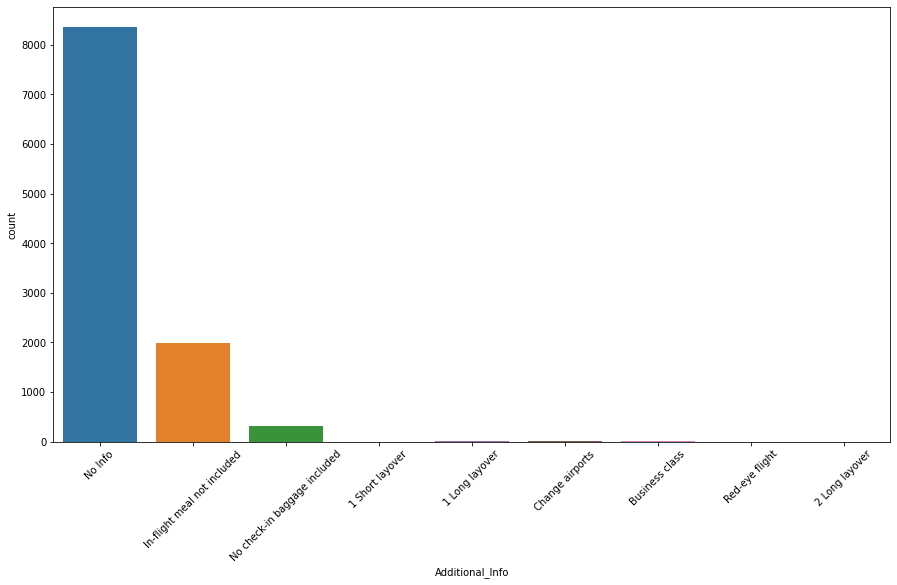

In [111]:
plt.figure(figsize=(15,8))
sns.countplot(x='Additional_Info',data=data_train)
plt.xticks(rotation=45)
data_train['Additional_Info'].value_counts()

Majority of the flights do not provide additional info, whereas some proved information such as In-flight meal not included, Bussiness class which colud be helpful in determining the price of the flight.

In [112]:
#data_train['Additional_Info'].value_counts()

In [113]:
#Add_info = categorical_data['Additional_Info']
#Add_info = pd.get_dummies(Add_info, drop_first = True)

In [114]:
#Add_info

In [115]:
categorical_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

This seems to be ordinal category hence we can perform label encoding

In [116]:
dict={'non-stop':0,'2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}


In [117]:
categorical_data['Total_Stops']=categorical_data['Total_Stops'].map(dict)

In [118]:
continous_columns=[Columns for Columns in data_train.columns if data_train[Columns].dtype!='O']

In [119]:
continous_columns

['Price',
 'day',
 'month',
 'weekday',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_minute',
 'travel_hours',
 'travel_minutes']

In [120]:
data_train[continous_columns].head()

,Price,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,3897,24,3,6,22,1,20,10,2,50
1,7662,5,1,5,5,13,50,15,7,25
2,13882,6,9,4,9,4,25,25,19,0
3,6218,5,12,3,18,23,5,30,5,25
4,13302,3,1,3,16,21,50,35,4,45


 #Concatenate dataframe --> categorical + Airline + Source + Destination#

In [121]:
FE_data_train=pd.concat([categorical_data,airline,source,destination,data_train[continous_columns]],axis=1)

In [122]:
FE_data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Dep_,Arrival_,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Kolkata_s,Mumbai,New Delhi_s,Cochin,Hyderabad,Kolkata,New Delhi,Price,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No Info,3,3,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,6,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No Info,2,0,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,5,13,50,15,7,25
2,Jet Airways,New Delhi,Cochin,19h 0m,2,No Info,2,3,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,13882,6,9,4,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No Info,1,3,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,3,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No Info,1,3,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,3,16,21,50,35,4,45


In [123]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
FE_data_train['Duration']=FE_data_train['Duration'].apply(duration)

In [124]:
FE_data_train['Duration']=pd.to_numeric(FE_data_train['Duration'])

In [125]:
FE_data_train['Price']=pd.to_numeric(FE_data_train['Price'])

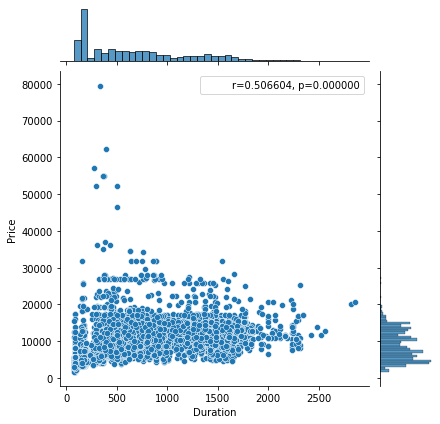

In [126]:
import scipy.stats as stats
graph = sns.jointplot(data=FE_data_train,x='Duration', y='Price')
r, p = stats.pearsonr(x=FE_data_train['Duration'],y=FE_data_train['Price'])
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)

In [127]:
FE_data_train.dtypes

Airline                              object
Source                               object
Destination                          object
Duration                              int64
Total_Stops                           int64
Additional_Info                      object
Dep_                                  int64
Arrival_                              int64
Route1                                int64
Route2                                int64
Route3                                int64
Route4                                int64
Route5                                int64
Air India                             uint8
GoAir                                 uint8
IndiGo                                uint8
Jet Airways                           uint8
Jet Airways Business                  uint8
Multiple carriers                     uint8
Multiple carriers Premium economy     uint8
SpiceJet                              uint8
Trujet                                uint8
Vistara                         

In [128]:
#import seaborn as sns
#import scipy.stats as stats

#sns.set(style="darkgrid", color_codes=True)
#j = sns.jointplot('Duration', 'Price', data = FE_data_train, kind='reg', height=8)
#j.annotate(stats.pearsonr)
#plt.show()

We get p-value < 0.05, hence we accept H1 and say the target variable and continuous independent variable are correlated. r = 0.51 says they are moderately related.

In [129]:
#FE_data_train.drop('Duration',axis=1,inplace=True)
FE_data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Dep_,Arrival_,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Kolkata_s,Mumbai,New Delhi_s,Cochin,Hyderabad,Kolkata,New Delhi,Price,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,IndiGo,Banglore,New Delhi,170,0,No Info,3,3,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,6,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,445,2,No Info,2,0,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,5,13,50,15,7,25
2,Jet Airways,New Delhi,Cochin,1140,2,No Info,2,3,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,13882,6,9,4,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,325,1,No Info,1,3,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,3,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,285,1,No Info,1,3,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,3,16,21,50,35,4,45


In [130]:
FE_data_train.shape

(10682, 42)

In [131]:
FE_data_train.columns.value_counts()

Mumbai                               1
New Delhi                            1
Multiple carriers                    1
Dep_                                 1
Source                               1
Destination                          1
travel_minutes                       1
Kolkata                              1
Vistara                              1
Arrival_Time_minute                  1
Arrival_Time_hour                    1
Route3                               1
Route5                               1
Hyderabad                            1
Total_Stops                          1
Trujet                               1
Additional_Info                      1
Jet Airways Business                 1
IndiGo                               1
Route4                               1
New Delhi_s                          1
month                                1
Jet Airways                          1
Duration                             1
Price                                1
Kolkata_s                

In [132]:
FE_data_train.drop('Destination',axis=1,inplace=True)
FE_data_train.drop('Source',axis=1,inplace=True)
FE_data_train.drop('Airline',axis=1,inplace=True)
FE_data_train.drop('Additional_Info',axis=1,inplace=True)

#Outlier Detection

In [133]:
#price outlier check
Q1=FE_data_train['Price'].quantile(0.25)
Q3=FE_data_train['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

5277.0
12373.0
7096.0


In [134]:
def distribution_plot(df,column):
  fig,(axis1,axis2)=plt.subplots(2,1)
  sns.distplot(df[column],ax=axis1)
  sns.boxplot(df[column],ax=axis2)

<Figure size 3600x3600 with 0 Axes>

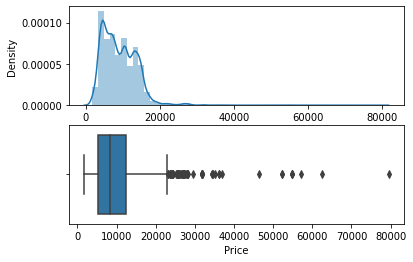

In [135]:
plt.figure(figsize=(50,50))
distribution_plot(FE_data_train,'Price')

Dealing with outliers

As we can see there are so many outliers with respect to the price

In [136]:
FE_data_train['Price']=np.where(FE_data_train['Price']>=40000,FE_data_train['Price'].median(),FE_data_train['Price'])

<Figure size 3600x3600 with 0 Axes>

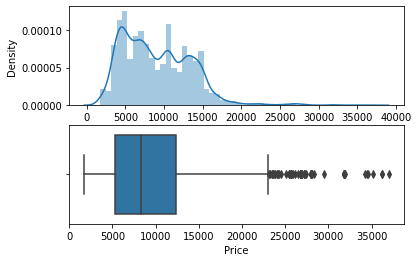

In [137]:
plt.figure(figsize=(50,50))
distribution_plot(FE_data_train,'Price')

Now lets seperate our independent and dependent data

In [138]:
X=FE_data_train.drop('Price',axis=1)
X

,Duration,Total_Stops,Dep_,Arrival_,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Kolkata_s,Mumbai,New Delhi_s,Cochin,Hyderabad,Kolkata,New Delhi,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,170,0,3,3,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,6,22,1,20,10,2,50
1,445,2,2,0,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,5,13,50,15,7,25
2,1140,2,2,3,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,6,9,4,9,4,25,25,19,0
3,325,1,1,3,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,3,18,23,5,30,5,25
4,285,1,1,3,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,3,16,21,50,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,1,3,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,9,2,19,22,55,25,2,30
10679,155,0,1,3,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,5,20,23,45,20,2,35
10680,180,0,2,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27,4,5,8,11,20,20,3,0
10681,160,0,0,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,1,3,11,14,30,10,2,40


In [139]:
X.shape

(10682, 37)

In [140]:
X.isnull().sum()

Duration                             0
Total_Stops                          0
Dep_                                 0
Arrival_                             0
Route1                               0
Route2                               0
Route3                               0
Route4                               0
Route5                               0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Kolkata_s                            0
Mumbai                               0
New Delhi_s                          0
Cochin                               0
Hyderabad                

In [141]:
y=FE_data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [142]:
y.isnull().sum()

0

In [143]:
y.describe()

count    10682.000000
mean      9046.090994
std       4387.489557
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      36983.000000
Name: Price, dtype: float64

#Feature Selection




Now we need to find the best features that will contribute to find a perfect relation with target variable

We do this also to reduce the curese of dimentionality to get rid of duplicate features

Correlation test:
Chi-square test for categorical variables :
Hypothesis testing :

HO: The two variables are independent

H1: The two variables are dependent

If p-value <0.01(we take confidence interval as 99%,and alpha =0.01, as from our analysis see that keeping significance level as 0.05,many variables became depedent)

so then we reject the null hypothesis saying that 2 variables are dependent.

There should be no dependencies between Independent variables.

So, we check variables who are highly dependent with other variables, we remove them

In [144]:
from sklearn.feature_selection import chi2
n= 10
for i in range(0,9):
    chi_x=FE_data_train.iloc[:,i+1:n]
    chi_y=FE_data_train.iloc[:,i]
    chi_scores = chi2(chi_x,chi_y)
    p_values = pd.Series(chi_scores[1],index = chi_x.columns)
    print("for",i)
    print(p_values)
    for j in range (0, len(p_values)):
        if (p_values[j]<0.01):
            print(p_values[j])

for 0
Total_Stops     0.000000e+00
Dep_           2.043474e-207
Arrival_        0.000000e+00
Route1          0.000000e+00
Route2          0.000000e+00
Route3          0.000000e+00
Route4          0.000000e+00
Route5          1.000000e+00
Air India       0.000000e+00
dtype: float64
0.0
2.0434735775748168e-207
0.0
0.0
0.0
0.0
0.0
0.0
for 1
Dep_          2.573071e-03
Arrival_      7.683597e-06
Route1        0.000000e+00
Route2        0.000000e+00
Route3        0.000000e+00
Route4        0.000000e+00
Route5        3.785176e-30
Air India    4.661198e-292
dtype: float64
0.0025730712676984733
7.683597413391396e-06
0.0
0.0
0.0
0.0
3.785175573206067e-30
4.661198399152815e-292
for 2
Arrival_     3.742166e-139
Route1        3.178585e-22
Route2       3.542574e-206
Route3        0.000000e+00
Route4        1.726598e-15
Route5        9.566774e-01
Air India     5.858412e-10
dtype: float64
3.7421655601565155e-139
3.1785851210211463e-22
3.542573656482321e-206
0.0
1.7265977052571074e-15
5.858412271521514

Checking the p-values, we drop: "Airline","Source","Destination","Total_Stops","Journey_Month","Journey_Day","Arrival_Time"

Comparison test :
Anova test
It is carried out to compare between each groups in a categorical variable.

ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.

Hypothesis testing :

H0: means of all levels of the categorical variable is same

H1: mean of at least one level is different

If p-value < 0.05 then we reject the null hypothesis.

In [145]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Price ~ C(Dep_)+C(weekday)',data=FE_data_train).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dep_),3.0,1.464432e+09,4.881439e+08,26.031808,9.030225e-17
C(weekday),6.0,4.026029e+09,6.710049e+08,35.783444,3.914948e-43
Residual,10672.0,2.001195e+11,1.875183e+07,NaN,NaN


In [146]:
probanova=list(aov_table["PR(>F)"])

In [147]:
for i in range(0,3):
    if probanova[i]>0.05:
        print(i)
    else:
        print('No values greater than 0.05')

No values greater than 0.05
No values greater than 0.05
No values greater than 0.05


As p-value<0.05 for all the variables, we reject H0 and hence no variables are removed

Correlation test:
Multicollinearity Test
It occurs when two or more independent variables are highly correlated with one another in a regression model.

if VIF is 1 --- Not correlated to any of the variables.

if VIF is between 1-5 --- Moderately correlated.

if VIF is above 5 --- Highly correlated.

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = FE_data_train.columns
    vif["VIF"] = [variance_inflation_factor(FE_data_train.values, i) for i in range(FE_data_train.shape[1])]
    return(vif)

In [149]:
df1=FE_data_train.drop(["Price"],axis=1)
calc_vif(df1)

,variables,VIF
0,Duration,inf
1,Total_Stops,40.932387
2,Dep_,1.169522
3,Arrival_,1.183205
4,Route1,inf
5,Route2,1.344333
6,Route3,20.334736
7,Route4,12.888040
8,Route5,1.881262
9,Air India,6.356936


In [150]:
from sklearn.feature_selection import mutual_info_classif

####  Feature Selection using Information Gain,

In [151]:
FSC=mutual_info_classif(X,y)

In [152]:
FS=pd.DataFrame(FSC,index=X.columns)

In [153]:
FS

,0
Duration,2.387043
Total_Stops,2.149156
Dep_,1.081157
Arrival_,1.076079
Route1,2.014713
Route2,2.785718
Route3,2.273047
Route4,1.461858
Route5,0.737580
Air India,0.779088


In [154]:
FS.columns=['Significance']
FS.sort_values(by='Significance',ascending=False,inplace=True)

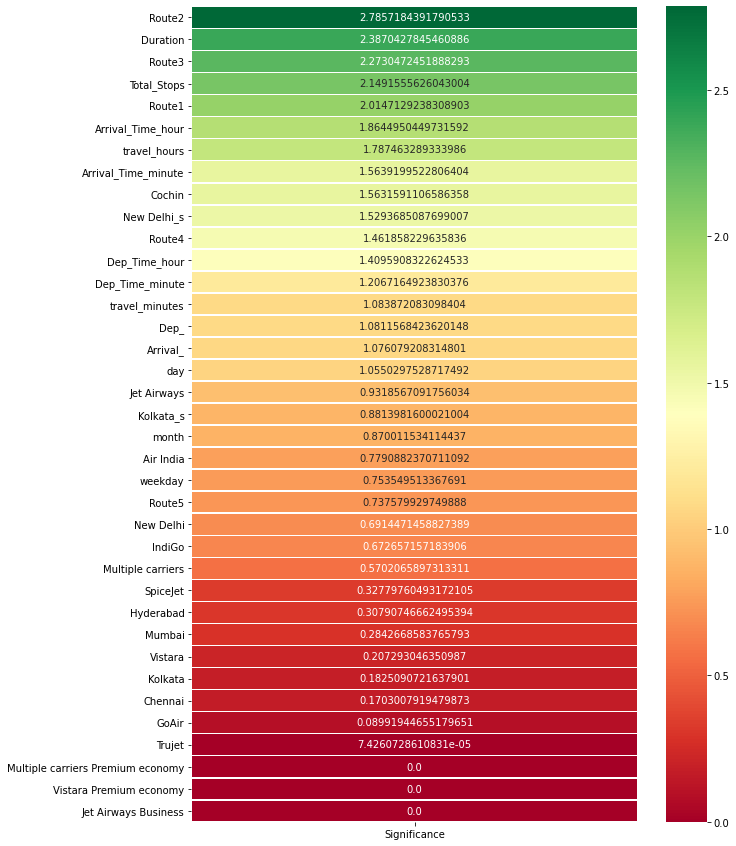

In [155]:
fig ,f=plt.subplots(figsize=(10,15))
sns.heatmap(FS,annot=True,fmt="",cmap='RdYlGn',linewidths=0.60,ax=f)
plt.show()

##Heatmap

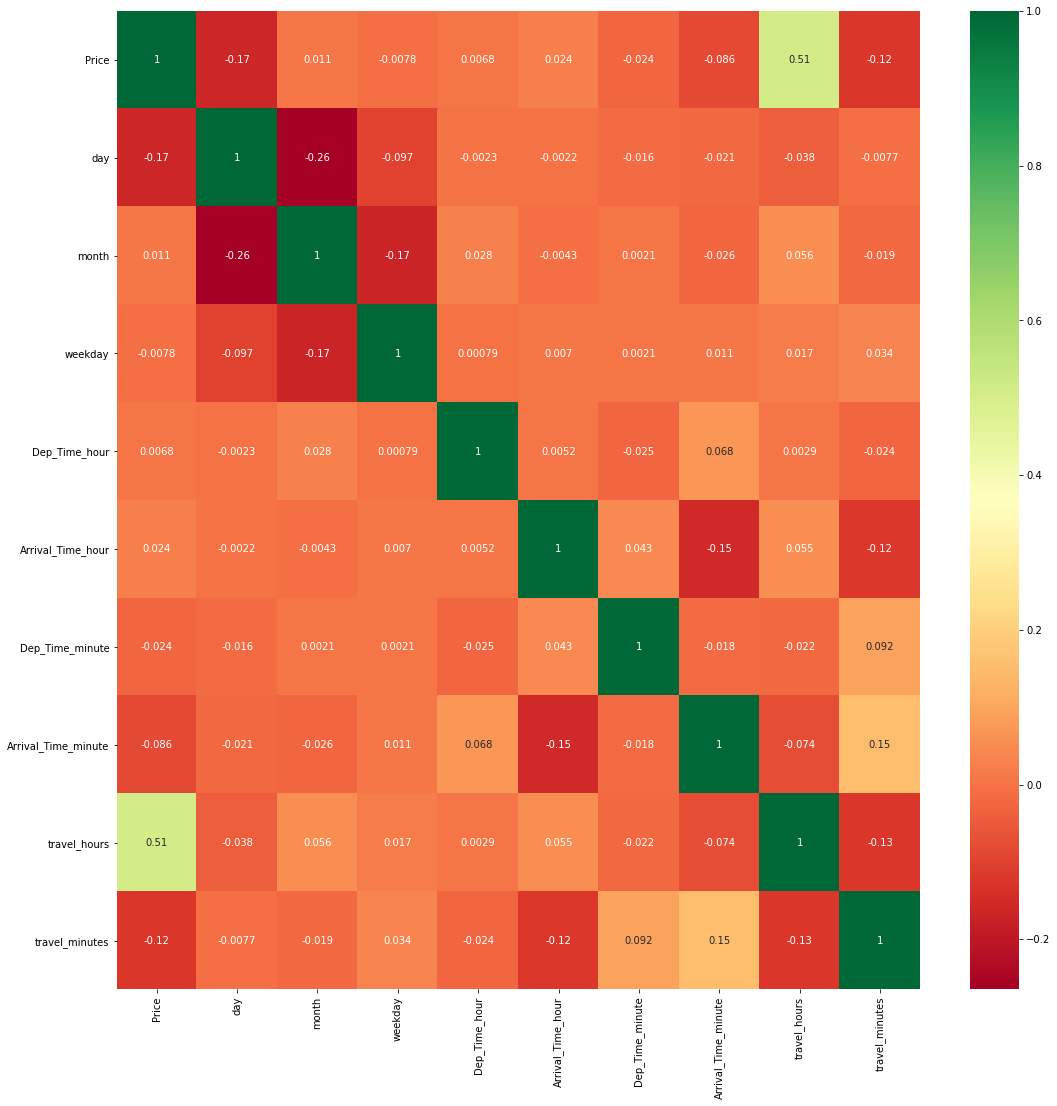

In [156]:
# Finding correlation betwwen Independent and Dependent Feature

plt.figure(figsize=(18,18))
sns.heatmap(data_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

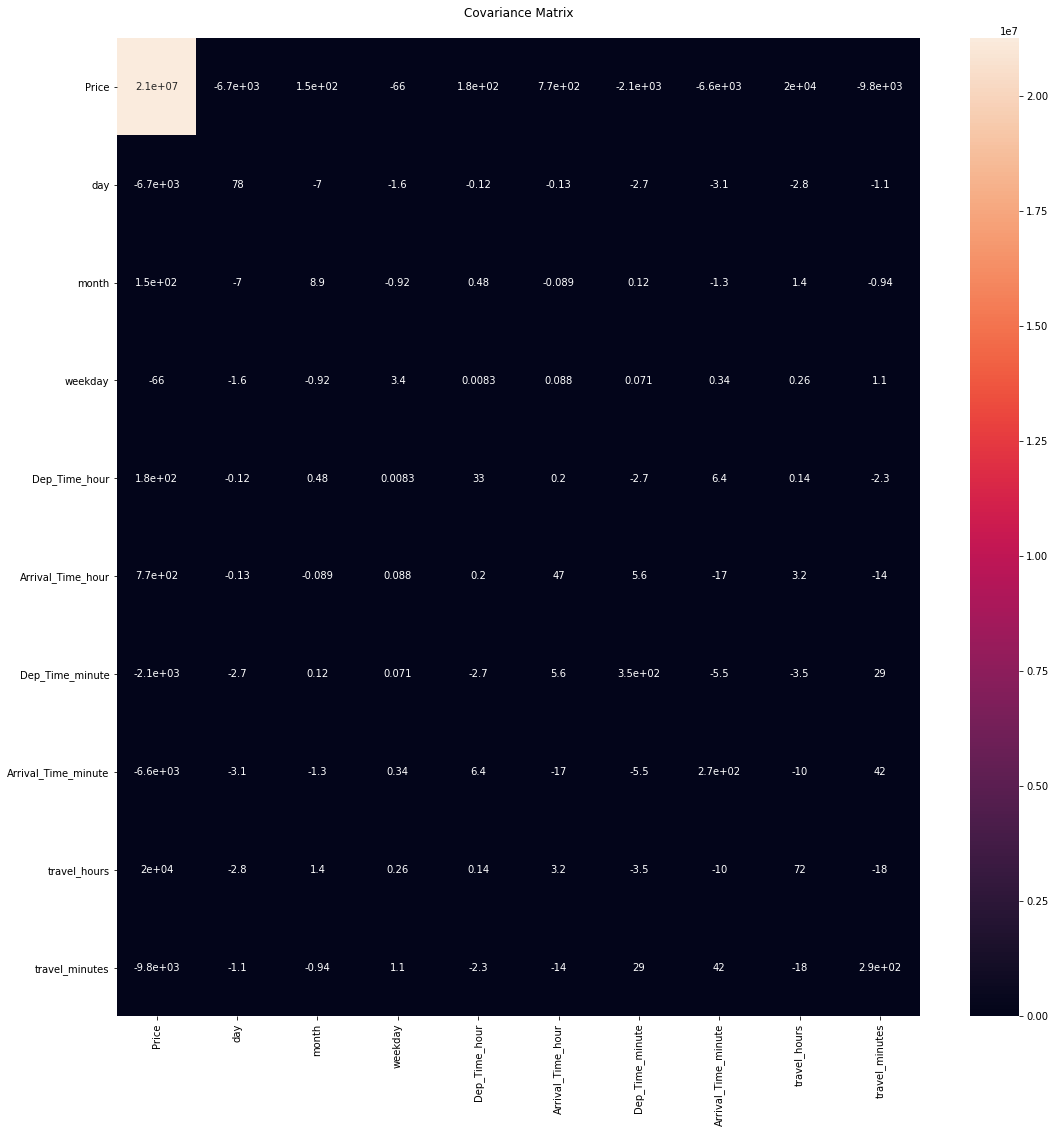

In [157]:
plt.figure(figsize=(18,18))
plt.title('Covariance Matrix\n')
sns.heatmap(data_train.cov(),annot=True)
plt.show()

#Model Train,Test split

In [158]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [159]:
X_train.shape

(8545, 37)

In [160]:
X_test.shape

(2137, 37)

In [161]:
X_test.isnull().sum()

Duration                             0
Total_Stops                          0
Dep_                                 0
Arrival_                             0
Route1                               0
Route2                               0
Route3                               0
Route4                               0
Route5                               0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Kolkata_s                            0
Mumbai                               0
New Delhi_s                          0
Cochin                               0
Hyderabad                

In [162]:
X_train.head()

,Duration,Total_Stops,Dep_,Arrival_,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Kolkata_s,Mumbai,New Delhi_s,Cochin,Hyderabad,Kolkata,New Delhi,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
5170,315,1,3,3,2,37,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,9,4,21,2,0,15,5,15
7427,275,1,2,2,3,32,6,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,9,1,5,10,35,10,4,35
4258,375,1,3,2,0,7,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,6,0,22,5,50,5,6,15
10514,500,1,1,3,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,6,12,4,17,1,10,30,8,20
2095,1365,1,2,2,0,7,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,3,3,8,7,55,40,22,45


In [163]:
from sklearn import preprocessing

In [164]:
#from sklearn.model_selection import train_test_split
#x1 = FE_data_train.drop('Price',axis=1).values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x1)
#X1 = pd.DataFrame(x_scaled)
#y1 = FE_data_train['Price'].values

In [165]:
#model = sm.OLS(y1,X1).fit()
#model.summary()

In [166]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [167]:
print(selection.feature_importances_)

[6.93706219e-02 1.36228877e-01 9.61702147e-03 8.69007097e-03
 9.59243108e-03 2.20331675e-02 1.98018349e-01 1.67333416e-02
 4.50870354e-04 7.21113312e-03 1.81623186e-03 1.69109095e-02
 9.60597384e-02 3.38786418e-04 2.49081821e-02 1.15077996e-03
 6.94273222e-03 1.00031847e-04 3.83943826e-03 9.83579123e-05
 8.54160332e-04 3.90792840e-03 3.57296492e-03 2.84458752e-03
 1.82815817e-03 3.69061934e-03 8.01426246e-04 6.28715791e-03
 1.03607934e-01 6.96971467e-02 4.01988332e-02 1.30031547e-02
 1.21228659e-02 1.61561970e-02 1.33628664e-02 6.68334214e-02
 1.11195042e-02]


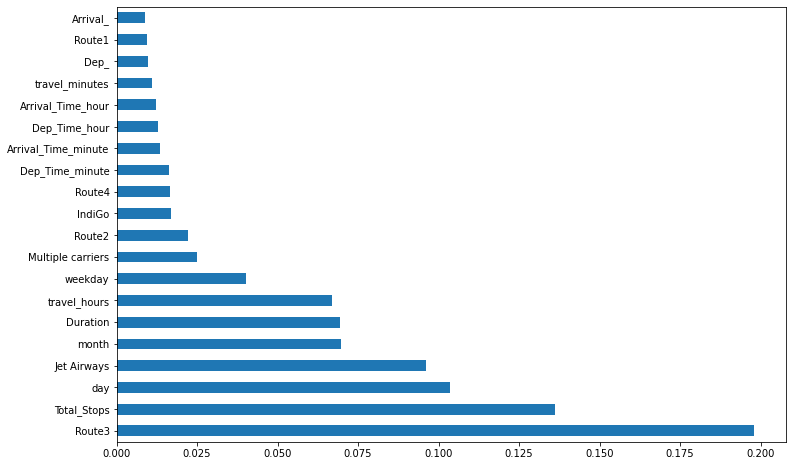

In [168]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [169]:
import pickle

In [170]:
import xgboost
from xgboost import XGBRegressor

In [171]:
def prediction(best_model,dump):
  model=best_model.fit(X_train,y_train)
  print('Training score is : {}'.format(model.score(X_train,y_train)))
  print('Test score is : {}'.format(model.score(X_test,y_test)))
  print('\n')
  y_predict=model.predict(X_test)
  print('The predicted values are : {}'.format(y_predict))
  print('\n')
  r2_score=metrics.r2_score(y_test,y_predict)
  print('coefficient of determination : {}'.format(r2_score))
  MAE=metrics.mean_absolute_error(y_test,y_predict)
  print('Mean absolute error : {}'.format(MAE))
  MSE=metrics.mean_squared_error(y_test,y_predict)
  print('Mean squared error : {}'.format(MSE))
  RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
  print('root mean square error : {}'.format(RMSE))


  print('\n')
  number_of_observations=100
  x_ax = range(len(y_test[:number_of_observations]))
  plt.plot(x_ax, y_test[:number_of_observations], label="original")
  plt.plot(x_ax, y_predict[:number_of_observations], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

  if dump==1:
    file=open('C:/Users/benes/Desktop/final year project/model.pkl','wb')
    pickle.dump(model,file)



In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

[03:50:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score is : 0.801252582055686
Test score is : 0.794035766051732


The predicted values are : [ 6726.417 10884.095 10240.34  ...  9776.032 10943.051 12750.923]


coefficient of determination : 0.794035766051732
Mean absolute error : 1459.6133824706803
Mean squared error : 3904760.591794323
root mean square error : 1976.0467078979493




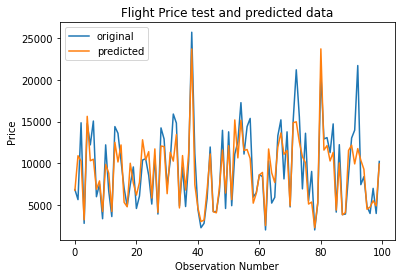

In [173]:
prediction(XGBRegressor(),0)

Training score is : 0.9524393969438529
Test score is : 0.8156131195066034


The predicted values are : [ 6645.89       12402.2275     12662.32       ... 10812.18
  8655.84752381 13133.43      ]


coefficient of determination : 0.8156131195066034
Mean absolute error : 1180.336612100334
Mean squared error : 3495687.628830465
root mean square error : 1869.6758084840444




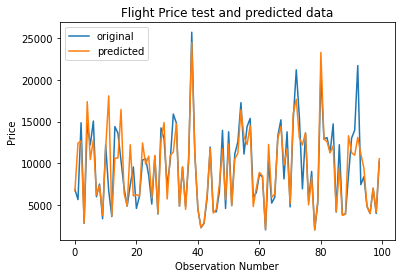

In [174]:
prediction(RandomForestRegressor(),0)

Training score is : 0.6051652272079138
Test score is : 0.5966537225757618


The predicted values are : [ 6932.61715359 12332.23570044  9695.21842545 ...  9770.26829902
 12637.53002577 13356.85856386]


coefficient of determination : 0.5966537225757618
Mean absolute error : 1990.312308309262
Mean squared error : 7646816.239603477
root mean square error : 2765.2877317927473




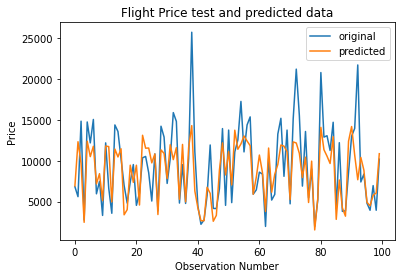

In [175]:
prediction(LinearRegression(),0)

In [176]:
#prediction(SVR(),0)

In [177]:
#prediction(LogisticRegression(),0)

#XGB hyperparameter tuning and cross validation

In [178]:
  x_xb=np.array(X_train)
  y_xb=np.array(y_train)

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
xgb = XGBRegressor()

In [181]:
best_xgb = GridSearchCV(xgb, param_grid={'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],'n_estimators':[100,200,500]}, cv=5, n_jobs=-1)

In [182]:
best_xgb.fit(x_xb,y_xb)

[03:53:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 2, 3],
                        

In [183]:
best_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [184]:
from sklearn.model_selection import RandomizedSearchCV , cross_val_score

In [185]:
scores = cross_val_score(best_xgb.best_estimator_, x_xb, y_xb, cv=5)
print("XGBoost Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

[03:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Cross validation score: 83.25% (+/- 2.28%)


In [186]:
scores = cross_val_score(best_xgb.best_estimator_, x_xb, y_xb, cv=5)
scores

[03:53:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.81266738, 0.83091939, 0.83218255, 0.84665161, 0.84001164])

In [187]:
y_predict1=best_xgb.predict(x_xb)
y_predict1

array([ 6778.5835,  8596.865 , 18418.236 , ..., 15784.624 ,  5414.301 ,
        3837.1094], dtype=float32)

In [188]:
metrics.r2_score(y_xb,y_predict1)


0.8612078772411484

In [189]:
#prediction(Lasso(),0)

Training score is : 0.967338679980439
Test score is : 0.7174841898574829


The predicted values are : [ 6818. 13014. 14848. ... 10678.  5406. 13029.]


coefficient of determination : 0.7174841898574829
Mean absolute error : 1355.6291452191547
Mean squared error : 5356059.063538319
root mean square error : 2314.316111411386




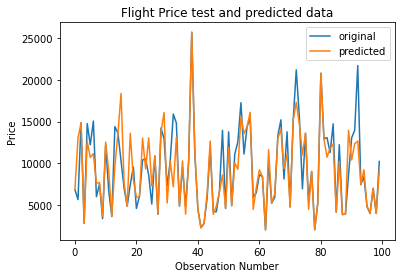

In [190]:
prediction(DecisionTreeRegressor(),0)

Training score is : 0.738974293082126
Test score is : 0.5859786545498245


The predicted values are : [ 7210.6  8700.8  9254.8 ...  9804.8 12143.6 12490.8]


coefficient of determination : 0.5859786545498245
Mean absolute error : 1769.7329901731398
Mean squared error : 7849198.877323351
root mean square error : 2801.6421751043354




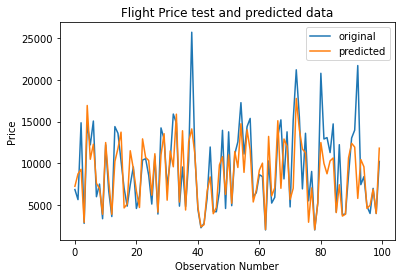

In [191]:
prediction(KNeighborsRegressor(),0)

1.Choose following method for hyperparameter tuning
    a.RandomizedSearchCV --> Fast way to Hypertune model
    b.GridSearchCV--> Slow way to hypertune my model
 


#Hyper parameter tuning Random forest and cross validation

In [192]:
from sklearn.model_selection import RandomizedSearchCV , cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [193]:
reg_rf=RandomForestRegressor()

In [194]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [195]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [196]:
# Random search of parameters, using 3 fold cross validation

RF_Airticket_price_prediction=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [197]:
RF_Airticket_price_prediction.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [198]:
RF_Airticket_price_prediction.best_params_

{'max_depth': 13,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 1200}

In [199]:
prediction=RF_Airticket_price_prediction.predict(X_test)

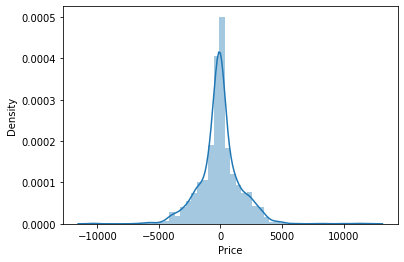

In [200]:
sns.distplot(y_test-prediction)

In [201]:
print('Test score is : {}'.format(RF_Airticket_price_prediction.score(X_test,y_test)))

Test score is : 0.8516535820326803


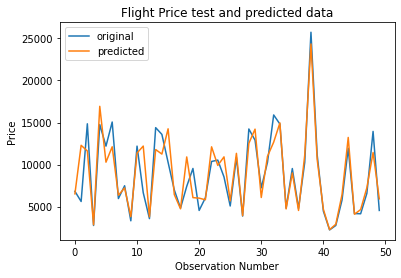

In [202]:
  number_of_observations=50
  x_ax = range(len(y_test[:number_of_observations]))
  plt.plot(x_ax, y_test[:number_of_observations], label="original")
  plt.plot(x_ax, prediction[:number_of_observations], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

In [203]:
scores = cross_val_score(RF_Airticket_price_prediction.best_estimator_, X_train, y_train, cv=5)
print("rf Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

rf Cross validation score: 83.84% (+/- 2.00%)


In [204]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1125.252243207714
MSE 2812416.6788983922
RMSE 1677.0261413879011


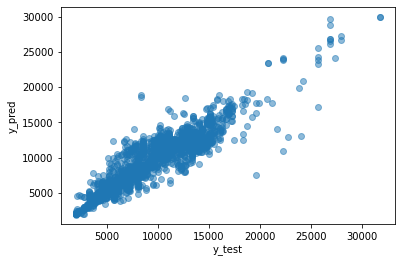

In [205]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [206]:
y_test

2029     6818.0
1603     5608.0
8773    14848.0
3541     2754.0
2079    14752.0
         ...   
4692     7888.0
8419     7934.0
2899    10678.0
7531     5177.0
5436    15129.0
Name: Price, Length: 2137, dtype: float64

In [207]:
prediction

array([ 6515.67302154, 12287.52001972, 11617.92683315, ...,
       10857.51860703,  9269.38560614, 13311.23844811])

In [208]:
#plt.scatter(x=y_test,y=prediction,color='r')
#plt.plot(y_test,y_test,color='b')
#plt.xlabel('Actual Price')
#plt.ylabel('Predicted Price')
#plt.title('RF')

In [209]:
FE_data_train.head(3)

,Duration,Total_Stops,Dep_,Arrival_,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Kolkata_s,Mumbai,New Delhi_s,Cochin,Hyderabad,Kolkata,New Delhi,Price,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,170,0,3,3,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24,3,6,22,1,20,10,2,50
1,445,2,2,0,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5,1,5,5,13,50,15,7,25
2,1140,2,2,3,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,13882.0,6,9,4,9,4,25,25,19,0


In [210]:
rf=RandomForestRegressor(n_estimators=200,random_state=0,min_samples_split=10)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [211]:
#def pred_ints(model, X, percentile=95):
    #err_down = []
    #err_up = []
    #for x in range(len(X)):
     #   preds = []
     #   for pred in model.estimators_:
     #       preds.append(pred.predict(X.loc[x]))
      #      preds = preds.reshape(1,-1)
      #  err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
      #  err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    #return err_down, err_up

In [212]:
#err_down, err_up = pred_ints(, X_test, percentile=90)
 
#truth = y_test
#correct = 0.
#for i, val in enumerate(truth):
 #   correct += 1
#print (correct/len(truth))

In [213]:
X_test.head()

,Duration,Total_Stops,Dep_,Arrival_,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Kolkata_s,Mumbai,New Delhi_s,Cochin,Hyderabad,Kolkata,New Delhi,day,month,weekday,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
2029,665,1,2,1,3,20,6,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,15,6,5,5,16,5,10,11,5
1603,435,1,2,1,2,15,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,10,17,20,35,7,15
8773,615,1,2,1,3,7,6,13,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,27,6,3,9,19,0,15,10,15
3541,90,0,3,3,1,19,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,18,6,1,2,4,35,5,1,30
2079,1200,1,3,1,0,0,8,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,3,0,20,30,30,20,0


In [214]:
pred_q = pd.DataFrame()

In [215]:
#rf.estimators_

In [216]:
#err_down = []
#err_up = []
#def benesh(X,percentile=95):
  #for pred in rf.estimators_:
    #pred_q = pd.DataFrame()
    #temp = pd.Series(pred.predict(X).round(2))
    #pred_q = pd.concat([pred_q,temp],axis=1)
  #print(pred_q)#
  #err_down.append(np.percentile(pred_q, (100 - percentile) / 2. ))
  #err_up.append(np.percentile(pred_q, 100 - (100 - percentile) / 2.))
  #return err_down, err_up


In [217]:
for pred in rf.estimators_:
  temp = pd.Series(pred.predict(X_test).round(2))
  pred_q = pd.concat([pred_q,temp],axis=1)
pred_q.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,6548.25,6544.57,6439.00,6669.86,6795.00,6668.73,6461.33,6687.08,6600.33,6428.82,6707.67,6725.67,6671.29,6618.00,6773.44,6738.13,6531.00,6594.67,6617.38,6624.53,6650.89,6429.14,6745.20,6764.00,6733.90,6442.00,6816.20,6570.40,6559.00,6707.47,6780.67,6628.4,6739.00,6620.00,6846.76,6627.27,6562.00,6706.00,6442.00,6554.95,...,6630.00,6550.00,6775.75,6707.58,6803.64,6442.00,6277.75,6502.89,6705.14,6701.08,6746.00,6799.33,6683.71,6442.00,6731.67,6684.00,6755.29,6757.00,6648.75,6464.70,6303.56,6688.25,6645.80,6716.89,6473.60,6429.08,6572.00,6683.22,6507.79,6666.92,6736.67,6593.67,6818.00,6716.00,6744.00,6700.36,6374.00,6588.67,6608.33,6611.67
1,11406.43,11316.14,12653.57,13426.75,14571.67,12474.81,13850.42,14781.00,13246.29,14219.71,14461.67,10988.10,14988.50,13666.53,11990.67,13693.89,12092.25,9070.71,8780.29,13263.00,9540.43,13075.07,14495.85,11053.75,12530.33,14561.88,12876.75,7837.00,13337.67,11853.75,12433.50,14781.0,9843.00,11215.54,12830.92,13195.44,10434.07,11936.77,13068.23,13337.67,...,13996.17,10518.62,12870.00,11369.60,12967.25,8259.00,11719.69,11367.29,15100.78,13763.25,10262.00,14606.07,7289.92,11597.20,12806.89,11461.08,10494.80,12232.00,10467.64,13531.77,10472.20,14620.78,14049.31,10964.06,15221.29,13748.83,11710.00,11605.47,14781.00,10313.62,14714.00,11197.82,14025.21,12668.83,12433.79,12626.40,13711.00,8586.00,14634.38,11608.80
2,7473.20,13378.00,14285.50,12781.70,12141.75,6943.00,10168.17,12484.29,13377.00,12699.00,13724.58,13090.00,12916.69,14460.43,12313.00,13744.75,13465.00,14253.50,14621.85,13616.87,15077.09,9260.64,14871.33,15583.00,12674.67,10905.00,7728.00,11616.67,13413.80,11737.50,12836.58,12424.5,12447.33,11146.90,14743.00,13139.29,14740.18,14291.58,14265.33,10291.00,...,9702.50,14148.80,15338.00,12514.88,11865.80,11855.43,12761.89,11713.67,10549.50,13378.00,11559.86,12788.88,10423.15,10275.75,11888.87,11503.13,9135.50,10701.00,11490.00,15023.00,14848.00,12063.90,12178.64,10167.85,8943.00,14953.00,13771.00,14077.33,12230.46,12372.00,12611.83,12030.50,12334.50,8727.22,9746.40,13182.88,13671.20,14469.88,13424.29,11939.73
3,2754.00,2754.00,3020.15,2884.67,2884.67,2953.62,2901.00,2876.85,2803.00,2707.07,2754.00,2754.00,2989.20,2754.00,2796.10,2884.67,2901.00,2792.27,2815.89,3076.00,2754.00,2754.00,2796.00,2754.00,2754.00,2796.00,3147.85,3059.09,2852.00,3074.31,2884.67,2754.0,2810.13,2907.29,2868.07,2754.00,2778.76,2667.43,2827.50,2827.50,...,3102.62,3025.86,2754.00,2788.60,2569.50,3150.14,2754.00,2610.71,2754.00,2901.00,2887.08,2880.00,2708.71,2863.67,2754.00,2754.00,2754.00,2807.45,2803.00,2754.00,2838.08,2937.75,2901.00,2901.00,2871.60,2754.00,2866.11,2860.47,2782.83,2754.00,2793.20,3013.50,3007.67,3087.00,2754.00,2754.00,2928.21,2901.00,2790.75,2922.00
4,12711.29,12651.50,12568.25,12651.50,22124.85,12462.20,12537.50,12568.25,12558.00,12485.00,31129.67,12613.50,19674.44,12537.50,14391.38,12704.00,22715.64,13664.83,12669.00,13098.73,22187.31,17153.27,12537.50,12620.75,12558.00,12704.00,12485.00,12523.00,12026.18,12428.00,12662.00,12669.0,18127.30,20086.00,12312.40,12537.50,12593.00,28907.89,26950.31,18324.00,...,29528.00,20408.00,33152.00,12593.00,12568.25,30858.80,19943.20,12537.50,21902.50,22485.20,27379.78,23834.17,12704.00,27606.00,12558.00,21097.57,26436.07,21607.70,22040.62,12651.50,11934.27,12537.50,21886.38,12662.00,22263.75,21401.27,15120.33,12369.14,12669.00,12651.50,11867.44,15819.25,15216.40,12163.14,22723.08,21682.00,12563.86,12594.50,12593.00,30666.93


In [218]:
quantiles= [0.025,0.05,0.95,0.975]

In [219]:
RF_actual_pred = pd.DataFrame()

In [220]:
#for q in quantiles:
 # s= pred_q.quantile(q=q,axis=1)
  #RF_actual_pred=pd.concat([RF_actual_pred,s],axis=1,sort=False)



#RF_actual_pred.head()


In [221]:
RF_actual_pred=pd.DataFrame()

for q in quantiles:
  s= pred_q.quantile(q=q,axis=1)
  RF_actual_pred=pd.concat([RF_actual_pred,s],axis=1)
RF_actual_pred = RF_actual_pred.set_index(y_test.index)
RF_actual_pred.columns=quantiles

RF_actual_pred.head()

,0.025,0.050,0.950,0.975
2029,6414.50575,6429.4820,6816.2900,6847.17100
1603,7286.06700,8349.8865,14781.0000,14860.35575
8773,8033.36825,8691.3875,15023.7000,15156.04375
3541,2706.92200,2754.0000,3069.4080,3112.02475
2079,11862.42900,12223.5885,28928.6065,30671.72675


In [222]:
RF_actual_pred['actual'] = y_test
RF_actual_pred

,0.025,0.05,0.95,0.975,actual
2029,6414.50575,6429.4820,6816.2900,6847.17100,6818.0
1603,7286.06700,8349.8865,14781.0000,14860.35575,5608.0
8773,8033.36825,8691.3875,15023.7000,15156.04375,14848.0
3541,2706.92200,2754.0000,3069.4080,3112.02475,2754.0
2079,11862.42900,12223.5885,28928.6065,30671.72675,14752.0
...,...,...,...,...,...
4692,7280.30950,7590.5545,13045.9395,13587.00000,7888.0
8419,6442.82625,6532.0590,8139.2890,8604.00850,7934.0
2899,9043.38725,9449.5490,12014.6440,12083.92850,10678.0
7531,5121.33875,5159.5530,16807.1600,17531.00000,5177.0


In [223]:
#RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)]-RF_actual_pred[np.min(quantiles)]
#RF_actual_pred

In [224]:
RF_actual_pred['interval'] = RF_actual_pred[0.975]-RF_actual_pred[0.025]
RF_actual_pred.sort_index(ascending=True)

,0.025,0.05,0.95,0.975,actual,interval
5,3755.71800,3823.7195,4104.6885,4165.42000,3873.0,409.70200
6,11087.00000,11282.0000,13817.0000,13817.00000,11087.0,2730.00000
7,17628.27175,21188.6120,26890.0000,27050.24650,22270.0,9421.97475
9,6696.18500,7020.7415,9819.9035,11442.30050,8625.0,4746.11550
12,3668.49875,3814.8240,5104.7130,5318.52750,4667.0,1650.02875
...,...,...,...,...,...,...
10637,4396.69100,4544.0000,7172.3800,7376.24150,7229.0,2979.55050
10644,9273.95550,9482.0260,11951.3500,12034.65525,10877.0,2760.69975
10646,10878.33625,11119.7455,13340.6620,13433.54000,11507.0,2555.20375
10649,5057.10250,5346.8800,6948.0945,7357.27300,4778.0,2300.17050


In [225]:
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred.sort_index(ascending=True)

,0.025,0.05,0.95,0.975,actual,interval
5,3755.71800,3823.7195,4104.6885,4165.42000,3873.0,409.70200
6,11087.00000,11282.0000,13817.0000,13817.00000,11087.0,2730.00000
7,17628.27175,21188.6120,26890.0000,27050.24650,22270.0,9421.97475
9,6696.18500,7020.7415,9819.9035,11442.30050,8625.0,4746.11550
12,3668.49875,3814.8240,5104.7130,5318.52750,4667.0,1650.02875
...,...,...,...,...,...,...
10637,4396.69100,4544.0000,7172.3800,7376.24150,7229.0,2979.55050
10644,9273.95550,9482.0260,11951.3500,12034.65525,10877.0,2760.69975
10646,10878.33625,11119.7455,13340.6620,13433.54000,11507.0,2555.20375
10649,5057.10250,5346.8800,6948.0945,7357.27300,4778.0,2300.17050


In [226]:
def showIntervals(df):
  df=df.reset_index(drop='index')
  plt.figure(figsize=(100,25))
  plt.plot(df['actual'],'go',markersize=10,label='Actual')
  plt.fill_between(np.arange(df.shape[0]),df[0.025],df[0.975],alpha=0.5,color="tan",label="Predicted interval")
  plt.xlabel("Ordered samples.")
  plt.ylabel("Values and prection intervals")
  plt.xlim([1400,1600])
  plt.ylim([1000,30000])


  plt.legend()
  plt.show()

In [227]:
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred.sort_index(ascending=True)

,0.025,0.05,0.95,0.975,actual,interval
5,3755.72,3823.72,4104.69,4165.42,3873.0,409.70
6,11087.00,11282.00,13817.00,13817.00,11087.0,2730.00
7,17628.27,21188.61,26890.00,27050.25,22270.0,9421.97
9,6696.18,7020.74,9819.90,11442.30,8625.0,4746.12
12,3668.50,3814.82,5104.71,5318.53,4667.0,1650.03
...,...,...,...,...,...,...
10637,4396.69,4544.00,7172.38,7376.24,7229.0,2979.55
10644,9273.96,9482.03,11951.35,12034.66,10877.0,2760.70
10646,10878.34,11119.75,13340.66,13433.54,11507.0,2555.20
10649,5057.10,5346.88,6948.09,7357.27,4778.0,2300.17


In [228]:
RF_actual_pred.describe()

,0.025,0.05,0.95,0.975,actual,interval
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,7408.509761,7661.932419,10739.301741,11131.438975,9042.845578,3722.929162
std,3372.548319,3489.311320,4955.096517,5147.474202,4355.148192,3068.985623
min,1759.000000,1759.000000,2110.620000,2131.180000,1965.000000,0.000000
25%,4636.710000,4744.620000,6722.000000,6966.460000,5268.000000,1609.710000
50%,6927.750000,7198.480000,10871.730000,11251.240000,8372.000000,3045.780000
75%,9732.510000,10211.490000,14151.000000,14477.720000,12287.000000,5124.320000
max,26461.900000,26785.730000,36235.000000,36235.000000,31825.000000,30367.380000


In [229]:
#RF_actual_pred = pd.DataFrame()

In [230]:
#RF_actual_pred.shape

In [231]:
#RF_actual_pred.shape

In [232]:
#obs = RF_actual_pred.shape[0]
#obs

In [233]:
#RF_actual_pred.iloc[520]['actual]

In [234]:
def correctpred(df):
  correct = 0
  obs = df.shape[0]
  
  for i in range(obs):
    if df.iloc[i][0.025] <= df.iloc[i]['actual'] <= df.iloc[i][0.975]:
        correct += 1
  print(correct/obs)

In [235]:
correctpred(RF_actual_pred)

0.8497894244267665


#Prediction intervals for random samples

In [236]:
#err_down, err_up = benesh(X_test,percentile=50)
#truth = y_test
#print(err_down)
#correct = 0.
#for i, val in enumerate(truth):
    #if err_down[i] <= val <= err_up[i]:
       # correct += 1
#print(correct/len(truth))

In [237]:
import pickle

#Model Deploy

In [238]:
# open a file, where you want to store the data
file=open('RF_Airticket_price_prediction.pkl','wb')

In [239]:
import gzip, pickle
with gzip.open('RF_Airticket_price_prediction.pkl', 'wb') as rfp:
    pickle.dump(RF_Airticket_price_prediction,rfp)

In [240]:
with gzip.open('RF_Airticket_price_prediction.pkl', 'rb') as ifp:
    print(pickle.load(ifp))

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [241]:
# dump information to that file
pickle.dump(RF_Airticket_price_prediction,file)

In [242]:
model=open('RF_Airticket_price_prediction.pkl','rb')
forest=pickle.load(model)

In [243]:
y_prediction4=forest.predict(X)

In [244]:
y_prediction4

array([ 5267.64965794,  7958.07856538, 13716.7899947 , ...,
        6184.67294579, 13188.46706894, 12187.11844495])

In [245]:
metrics.r2_score(y,y_prediction4)

0.9008931903928438

In [246]:
yfinal=pd.DataFrame(data=y_prediction4)

In [247]:
yfinal=yfinal.rename(columns={0: "preds"})

In [248]:
yfinal.describe()

,preds
count,10682.000000
mean,9060.078766
std,4077.245809
min,1891.077644
25%,5634.651146
50%,8794.401363
75%,12096.608414
max,30541.205297


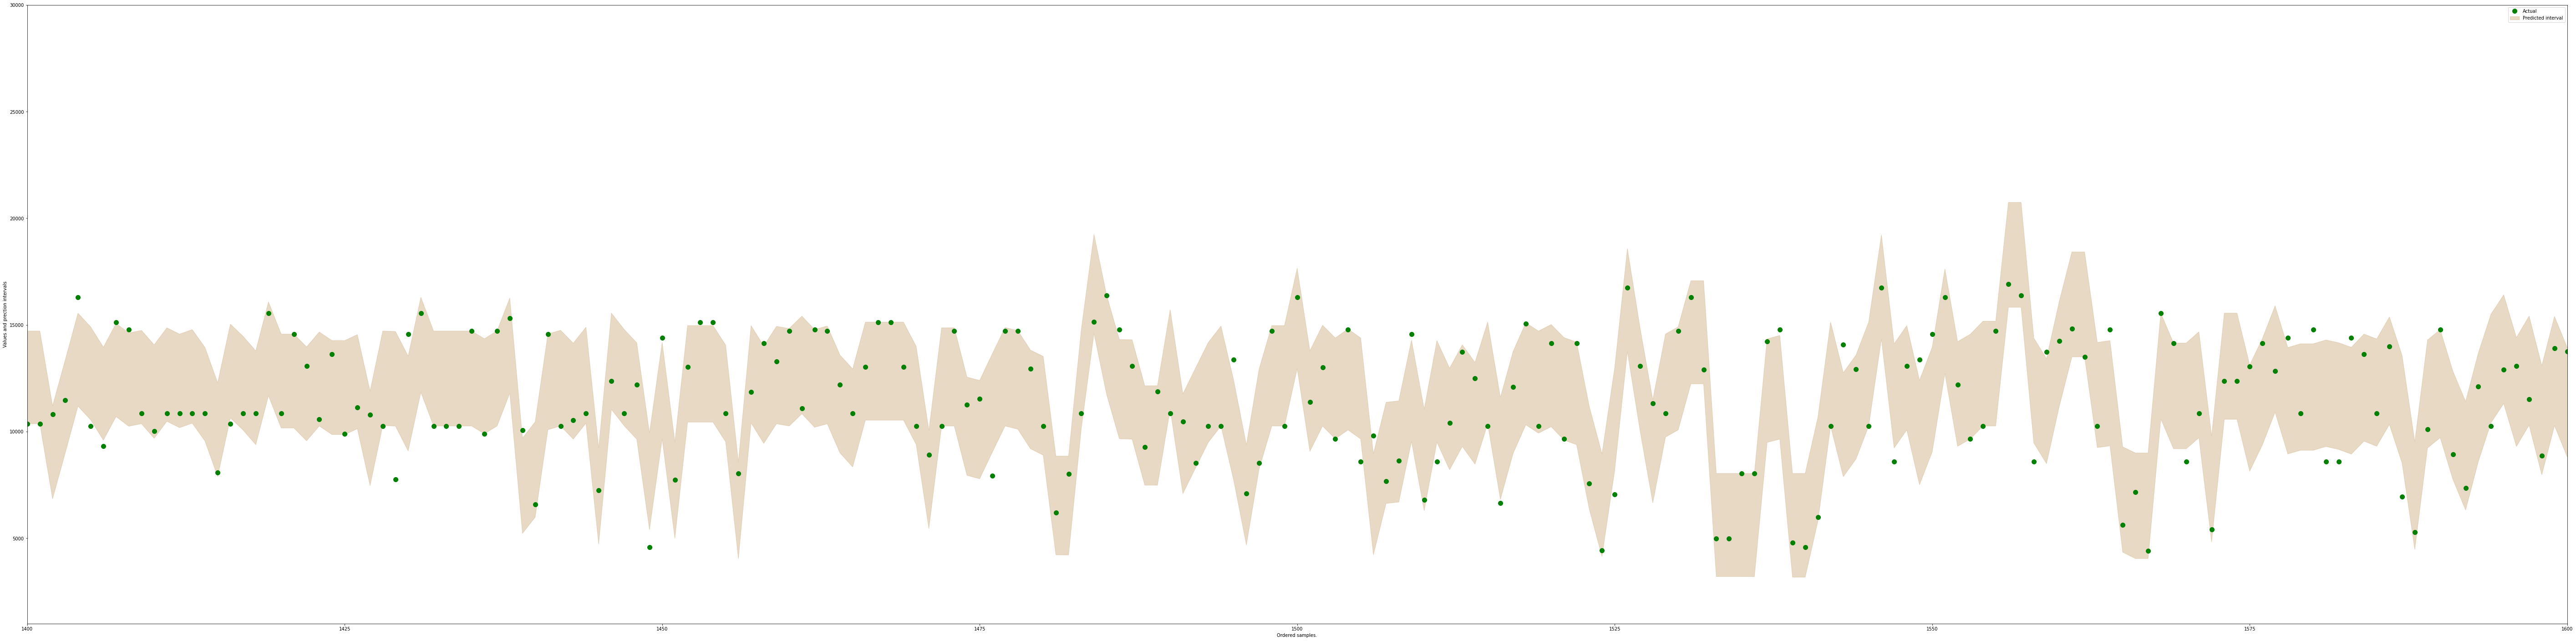

In [249]:
#took random samples for better vizualization
showIntervals(RF_actual_pred)

In [250]:
heights=y.to_numpy()
weights=y_prediction4

/n


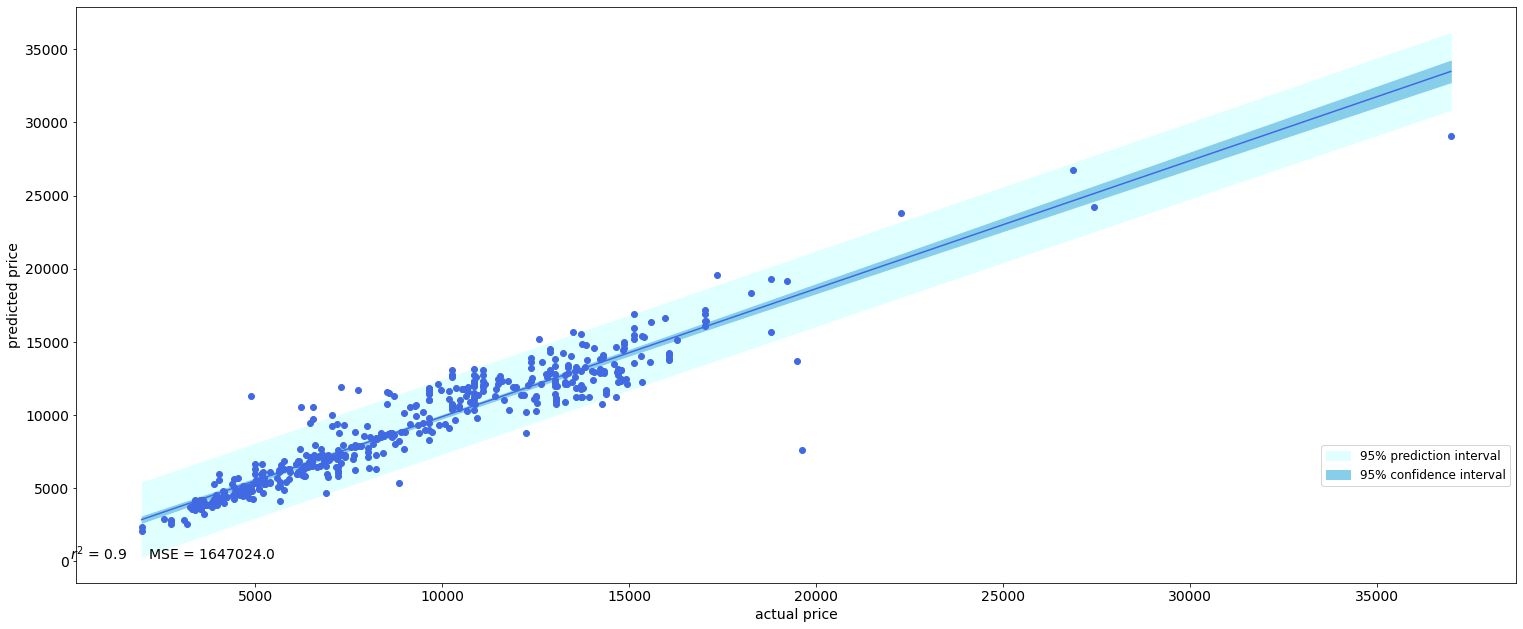

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


x = heights[:500]
y = weights[:500]

slope, intercept = np.polyfit(x, y, 1)  # linear model adjustment

y_model = np.polyval([slope, intercept], x)   # modeling...

x_mean = np.mean(x)
y_mean = np.mean(y)
n = x.size                        # number of samples
m = 2                             # number of parameters
dof = n - m                       # degrees of freedom
t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence

residual = y - y_model

std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

# calculating the r2
# Pearson's correlation coefficient
numerator = np.sum((x - x_mean)*(y - y_mean))
denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
correlation_coef = numerator / denominator
r2 = correlation_coef**2

# mean squared error
MSE = 1/n * np.sum( (y - y_model)**2 )

# to plot the adjusted model
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = np.polyval([slope, intercept], x_line)

# confidence interval
ci = t * std_error * (1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5
# predicting interval
pi = t * std_error * (1 + 1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5  

###### Ploting

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([.1, .1, .8, .8])

ax.plot(x, y, 'o', color = 'royalblue')
ax.plot(x_line, y_line, color = 'royalblue')
ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

ax.set_xlabel('actual price')
ax.set_ylabel('predicted price')

# rounding and position must be changed for each case and preference
a = str(np.round(intercept))
b = str(np.round(slope,2))
r2s = str(np.round(r2,2))
MSEs = str(np.round(MSE))

#ax.text(45, 110, 'y = ' + a + ' + ' + b + ' x')

print('/n')
ax.text(45, 100, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)

plt.legend(bbox_to_anchor=(1, .25), fontsize=12)

#plotting 500 values for better visualization.

In [252]:
# Pearson's correlation coefficient
numerator = np.sum((x - x_mean)*(y - y_mean))
denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
correlation_coef = numerator / denominator
r2 = correlation_coef**2
r2

0.8980554089828949